In [1]:
# Importing packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

#importing libraries from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold,RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# importing library for scaling and metrics
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import os
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import precision_score, recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


#ignoring unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

#display all columns
pd.set_option('display.max_columns', 100)

#matplotlib settings
%matplotlib inline
!pip install openpyxl

## STEP 1: Reading and Understanding the data

In [2]:
# Load and preprocess the data
url = "https://www.macrohistory.net/app/download/9834512569/JSTdatasetR6.xlsx?t=1687773948"
df_jst = pd.read_excel(url)
df_jst.head()

year    country  iso  ifs     pop      rgdpmad  rgdpbarro  rconsbarro  \
0  1870  Australia  AUS  193  1775.0  3273.239437  13.836157   21.449734   
1  1871  Australia  AUS  193  1675.0  3298.507463  13.936864   19.930801   
2  1872  Australia  AUS  193  1722.0  3553.426249  15.044247   21.085006   
3  1873  Australia  AUS  193  1769.0  3823.629169  16.219443   23.254910   
4  1874  Australia  AUS  193  1822.0  3834.796926  16.268228   23.458050   

      gdp        iy       cpi         ca  imports  exports  narrowm  money  \
0  208.78  0.109266  2.708333  -6.147594     36.0     37.0     23.3   54.3   
1  211.56  0.104579  2.666667   5.260774     34.0     46.0     27.2   59.5   
2  227.40  0.130438  2.541667   7.867636     38.0     53.0     36.2   68.5   
3  266.54  0.124986  2.541667 -11.047833     49.0     50.0     38.6   73.7   
4  287.58  0.141960  2.666667  -5.563959     49.0     54.0     37.9   79.3   

   stir    ltrate     hpnom  unemp      wage   debtgdp  revenue  expenditure  \
0  4.88  4.911817  0.492253    NaN  0.448118  0.172568      NaN          NaN   
1  4.60  4.844633  0.469877    NaN  0.439417  0.191799      NaN          NaN   
2  4.60  4.737350  0.484794    NaN  0.452469  0.154920      NaN          NaN   
3  4.40  4.671958  0.469877    NaN  0.491625  0.142692      NaN          NaN   
4  4.50  4.653317  0.566836    NaN  0.509028  0.194322      NaN          NaN   

      xrusd  tloans  tmort  thh  tbus  bdebt        lev         ltd  \
0  0.366946  54.792  1.680  NaN   NaN    NaN  25.016659  119.832039   
1  0.369146  53.748  1.766  NaN   NaN    NaN  23.983004  107.037880   
2  0.369239  55.822  1.470  NaN   NaN    NaN  22.445646   94.909546   
3  0.362405  65.380  1.364  NaN   NaN    NaN  21.004997  101.708099   
4  0.372223  71.478  1.434  NaN   NaN    NaN  20.974375  102.079346   

     noncore  crisisJST  crisisJST_old  peg  peg_strict peg_type peg_base  \
0  32.928768        0.0            0.0  1.0         1.0      PEG      GBR   
1  30.213655        0.0            0.0  1.0         1.0      PEG      GBR   
2  26.860411        0.0            0.0  1.0         1.0      PEG      GBR   
3  28.645016        0.0            0.0  1.0         1.0      PEG      GBR   
4  28.298048        0.0            0.0  1.0         1.0      PEG      GBR   

   JSTtrilemmaIV     eq_tr  housing_tr  bond_tr  bill_rate  rent_ipolated  \
0            NaN -0.004904         NaN      NaN     0.0488            NaN   
1          -0.42  0.110193         NaN      NaN     0.0460            NaN   
2           1.27  0.176749         NaN      NaN     0.0460            NaN   
3           0.59  0.151686         NaN      NaN     0.0440            NaN   
4          -1.08  0.191481         NaN      NaN     0.0450            NaN   

   housing_capgain_ipolated  housing_capgain  housing_rent_rtn  \
0                       NaN              NaN               NaN   
1                       NaN        -0.045456               NaN   
2                       NaN         0.031747               NaN   
3                       NaN        -0.030770               NaN   
4                       NaN         0.206350               NaN   

   housing_rent_yd  eq_capgain     eq_dp  eq_capgain_interp  eq_tr_interp  \
0              NaN   -0.070045  0.071417                NaN           NaN   
1              NaN    0.041654  0.065466                NaN           NaN   
2              NaN    0.108945  0.062997                NaN           NaN   
3              NaN    0.083086  0.064484                NaN           NaN   
4              NaN    0.119389  0.063503                NaN           NaN   

   eq_dp_interp  bond_rate  eq_div_rtn  capital_tr  risky_tr  safe_tr  
0           NaN   0.049118    0.066415         NaN       NaN      NaN  
1           NaN   0.048446    0.068193         NaN       NaN      NaN  
2           NaN   0.047373    0.069861         NaN       NaN      NaN  
3           NaN   0.046720    0.069842         NaN       NaN      NaN  
4           NaN   0.046

In [3]:
df = df_jst.copy()
df.rename(columns={
        "crisisJST": "crisis",
        'stir': 'srate',
        'ltrate': 'lrate',
        'iy': 'inv_gdp',
        'debtgdp': 'pdebt_gdp',
        'money': 'bmon',
        'narrowm': 'nmon',
        'tloans': 'tloan',
        'tbus': 'bloan',
        'thh': 'hloan',
        'tmort': 'mort',
        'stocks': 'stock',
        'hpnom': 'hp',
        'rconsbarro': 'cons',
        "rgdpbarro": "rgdppc"
    }, inplace=True)

In [4]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2718 entries, 0 to 2717
Data columns (total 59 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      2718 non-null   int64  
 1   country                   2718 non-null   object 
 2   iso                       2718 non-null   object 
 3   ifs                       2718 non-null   int64  
 4   pop                       2667 non-null   float64
 5   rgdpmad                   2666 non-null   float64
 6   rgdppc                    2664 non-null   float64
 7   cons                      2561 non-null   float64
 8   gdp                       2641 non-null   float64
 9   inv_gdp                   2425 non-null   float64
 10  cpi                       2666 non-null   float64
 11  ca                        2489 non-null   float64
 12  imports                   2603 non-null   float64
 13  exports                   2603 non-null   float64
 14  nmon    

In [5]:
# Summary statistics
df.isnull().sum()

year                           0
country                        0
iso                            0
ifs                            0
pop                           51
rgdpmad                       52
rgdppc                        54
cons                         157
gdp                           77
inv_gdp                      293
cpi                           52
ca                           229
imports                      115
exports                      115
nmon                         114
bmon                         200
srate                        198
lrate                         88
hp                           668
unemp                        769
wage                          88
pdebt_gdp                    229
revenue                      176
expenditure                  157
xrusd                         53
tloan                        253
mort                         406
hloan                       1344
bloan                       1419
bdebt                        853
lev       

## STEP 2: Data Handling

housing_capgain_ipolated    99.816041
eq_dp_interp                99.779249
eq_tr_interp                99.742458
eq_capgain_interp           99.742458
rent_ipolated               98.933039
bloan                       52.207506
hloan                       49.448124
capital_tr                  32.671082
risky_tr                    31.788079
bdebt                       31.383370
housing_rent_rtn            29.764533
housing_tr                  29.764533
housing_rent_yd             29.323032
unemp                       28.292862
housing_capgain             24.760854
hp                          24.576895
JSTtrilemmaIV               23.730684
eq_div_rtn                  20.419426
eq_dp                       20.198675
eq_capgain                  20.161884
noncore                     17.954378
safe_tr                     17.328918
eq_tr                       16.740250
bond_tr                     15.562914
ltd                         15.415747
mort                        14.937454
bill_rate   

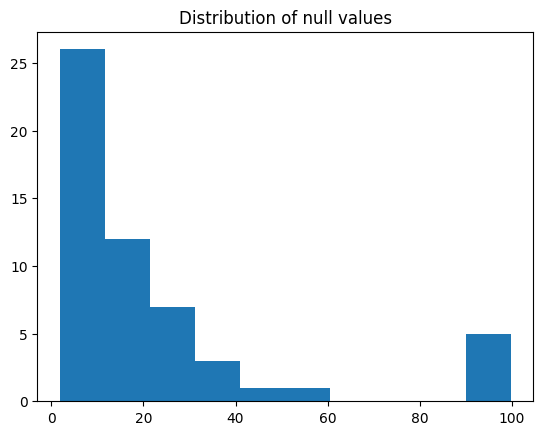

In [6]:
#Finding percentage of null values and their distribution to find the cleanup factor
per_null = round(100*(df.isnull().sum()/len(df.index)), 2)
plt.title("Distribution of null values")
plt.hist(per_null[per_null>0].sort_values(ascending= False))
temp = (100* df.isnull().sum()/len(df)).sort_values(ascending=False)
print(temp.to_string())

In [7]:
#cleaning columns with null values greater than 60% and verifying the percentage of null values
df.drop(per_null[per_null > 60].index, axis=1, inplace=True)
per_null = round(100*(df.isnull().sum()/len(df.index)), 2)
per_null[per_null>0].sort_values(ascending= False)

bloan               52.21
hloan               49.45
capital_tr          32.67
risky_tr            31.79
bdebt               31.38
housing_rent_rtn    29.76
housing_tr          29.76
housing_rent_yd     29.32
unemp               28.29
housing_capgain     24.76
hp                  24.58
JSTtrilemmaIV       23.73
eq_div_rtn          20.42
eq_dp               20.20
eq_capgain          20.16
noncore             17.95
safe_tr             17.33
eq_tr               16.74
bond_tr             15.56
ltd                 15.42
mort                14.94
bill_rate           13.50
lev                 13.43
bond_rate           12.40
inv_gdp             10.78
tloan                9.31
peg_base             9.31
ca                   8.43
pdebt_gdp            8.43
bmon                 7.36
srate                7.28
revenue              6.48
expenditure          5.78
cons                 5.78
crisisJST_old        5.52
exports              4.23
imports              4.23
nmon                 4.19
lrate       

In [8]:
# Dropping rows for the Null values of crisisJST
df.dropna(axis='rows', inplace=True,  subset=['crisis','gdp','rgdppc'])

In [9]:
per_null = round(100*(df.isnull().sum()/len(df.index)), 2)
per_null[per_null>0].sort_values(ascending= True)

lrate                1.33
wage                 1.36
nmon                 2.16
imports              2.27
exports              2.27
crisisJST_old        3.68
cons                 3.83
expenditure          3.94
revenue              4.59
srate                5.34
bmon                 5.53
ca                   5.95
pdebt_gdp            6.03
tloan                7.43
peg_base             7.69
inv_gdp              8.18
bond_rate           10.69
lev                 11.56
bill_rate           11.63
mort                13.15
ltd                 13.60
bond_tr             13.76
eq_tr               15.01
safe_tr             15.57
noncore             16.22
eq_capgain          18.23
eq_dp               18.26
eq_div_rtn          18.49
JSTtrilemmaIV       21.71
hp                  23.11
housing_capgain     23.23
unemp               26.75
housing_rent_yd     27.89
housing_tr          28.34
housing_rent_rtn    28.34
bdebt               29.63
risky_tr            30.43
capital_tr          31.34
hloan       

In [10]:
# Implement mean imputation for financial ratios 'inv_gdp' and 'pdebt_gdp'
financial_ratios = ['inv_gdp', 'pdebt_gdp']
for col in financial_ratios:
    mean_value = df[col].mean()
    df[col].fillna(mean_value, inplace=True)

# Implement forward fill for time-series data 'srate' and 'lrate'
time_series_cols = ['srate', 'lrate']
df[time_series_cols] = df[time_series_cols].fillna(method='ffill')

# Show the first few rows of the further cleaned dataset
df.head()


year    country  iso  ifs     pop      rgdpmad     rgdppc       cons  \
0  1870  Australia  AUS  193  1775.0  3273.239437  13.836157  21.449734   
1  1871  Australia  AUS  193  1675.0  3298.507463  13.936864  19.930801   
2  1872  Australia  AUS  193  1722.0  3553.426249  15.044247  21.085006   
3  1873  Australia  AUS  193  1769.0  3823.629169  16.219443  23.254910   
4  1874  Australia  AUS  193  1822.0  3834.796926  16.268228  23.458050   

      gdp   inv_gdp       cpi         ca  imports  exports  nmon  bmon  srate  \
0  208.78  0.109266  2.708333  -6.147594     36.0     37.0  23.3  54.3   4.88   
1  211.56  0.104579  2.666667   5.260774     34.0     46.0  27.2  59.5   4.60   
2  227.40  0.130438  2.541667   7.867636     38.0     53.0  36.2  68.5   4.60   
3  266.54  0.124986  2.541667 -11.047833     49.0     50.0  38.6  73.7   4.40   
4  287.58  0.141960  2.666667  -5.563959     49.0     54.0  37.9  79.3   4.50   

      lrate        hp  unemp      wage  pdebt_gdp  revenue  expenditure  \
0  4.911817  0.492253    NaN  0.448118   0.172568      NaN          NaN   
1  4.844633  0.469877    NaN  0.439417   0.191799      NaN          NaN   
2  4.737350  0.484794    NaN  0.452469   0.154920      NaN          NaN   
3  4.671958  0.469877    NaN  0.491625   0.142692      NaN          NaN   
4  4.653317  0.566836    NaN  0.509028   0.194322      NaN          NaN   

      xrusd   tloan   mort  hloan  bloan  bdebt        lev         ltd  \
0  0.366946  54.792  1.680    NaN    NaN    NaN  25.016659  119.832039   
1  0.369146  53.748  1.766    NaN    NaN    NaN  23.983004  107.037880   
2  0.369239  55.822  1.470    NaN    NaN    NaN  22.445646   94.909546   
3  0.362405  65.380  1.364    NaN    NaN    NaN  21.004997  101.708099   
4  0.372223  71.478  1.434    NaN    NaN    NaN  20.974375  102.079346   

     noncore  crisis  crisisJST_old  peg  peg_strict peg_type peg_base  \
0  32.928768     0.0            0.0  1.0         1.0      PEG      GBR   
1  30.213655     0.0            0.0  1.0         1.0      PEG      GBR   
2  26.860411     0.0            0.0  1.0         1.0      PEG      GBR   
3  28.645016     0.0            0.0  1.0         1.0      PEG      GBR   
4  28.298048     0.0            0.0  1.0         1.0      PEG      GBR   

   JSTtrilemmaIV     eq_tr  housing_tr  bond_tr  bill_rate  housing_capgain  \
0            NaN -0.004904         NaN      NaN     0.0488              NaN   
1          -0.42  0.110193         NaN      NaN     0.0460        -0.045456   
2           1.27  0.176749         NaN      NaN     0.0460         0.031747   
3           0.59  0.151686         NaN      NaN     0.0440        -0.030770   
4          -1.08  0.191481         NaN      NaN     0.0450         0.206350   

   housing_rent_rtn  housing_rent_yd  eq_capgain     eq_dp  bond_rate  \
0               NaN              NaN   -0.070045  0.071417   0.049118   
1               NaN              NaN    0.041654  0.065466   0.048446   
2               NaN              NaN    0.108945  0.062997   0.047373   
3               NaN              NaN    0.083086  0.064484   0.046720   
4               NaN              NaN    0.119389  0.063503   0.046533   

   eq_div_rtn  capital_tr  risky_tr  safe_tr  
0    0.066415         NaN       NaN      NaN  
1    0.068193         NaN       NaN      NaN  
2    0.069861         NaN       NaN      NaN  
3    0.069842         NaN       NaN      NaN  
4    0.071085         NaN       NaN      NaN

In [11]:
# Implement Spline Interpolation for the dataset
df = df.interpolate(method='spline', order=3)

# Show the first few rows of the dataset after interpolation
df.head()


year    country  iso  ifs     pop      rgdpmad     rgdppc       cons  \
0  1870  Australia  AUS  193  1775.0  3273.239437  13.836157  21.449734   
1  1871  Australia  AUS  193  1675.0  3298.507463  13.936864  19.930801   
2  1872  Australia  AUS  193  1722.0  3553.426249  15.044247  21.085006   
3  1873  Australia  AUS  193  1769.0  3823.629169  16.219443  23.254910   
4  1874  Australia  AUS  193  1822.0  3834.796926  16.268228  23.458050   

      gdp   inv_gdp       cpi         ca  imports  exports  nmon  bmon  srate  \
0  208.78  0.109266  2.708333  -6.147594     36.0     37.0  23.3  54.3   4.88   
1  211.56  0.104579  2.666667   5.260774     34.0     46.0  27.2  59.5   4.60   
2  227.40  0.130438  2.541667   7.867636     38.0     53.0  36.2  68.5   4.60   
3  266.54  0.124986  2.541667 -11.047833     49.0     50.0  38.6  73.7   4.40   
4  287.58  0.141960  2.666667  -5.563959     49.0     54.0  37.9  79.3   4.50   

      lrate        hp  unemp      wage  pdebt_gdp  revenue  expenditure  \
0  4.911817  0.492253    NaN  0.448118   0.172568      NaN          NaN   
1  4.844633  0.469877    NaN  0.439417   0.191799      NaN          NaN   
2  4.737350  0.484794    NaN  0.452469   0.154920      NaN          NaN   
3  4.671958  0.469877    NaN  0.491625   0.142692      NaN          NaN   
4  4.653317  0.566836    NaN  0.509028   0.194322      NaN          NaN   

      xrusd   tloan   mort  hloan  bloan  bdebt        lev         ltd  \
0  0.366946  54.792  1.680    NaN    NaN    NaN  25.016659  119.832039   
1  0.369146  53.748  1.766    NaN    NaN    NaN  23.983004  107.037880   
2  0.369239  55.822  1.470    NaN    NaN    NaN  22.445646   94.909546   
3  0.362405  65.380  1.364    NaN    NaN    NaN  21.004997  101.708099   
4  0.372223  71.478  1.434    NaN    NaN    NaN  20.974375  102.079346   

     noncore  crisis  crisisJST_old  peg  peg_strict peg_type peg_base  \
0  32.928768     0.0            0.0  1.0         1.0      PEG      GBR   
1  30.213655     0.0            0.0  1.0         1.0      PEG      GBR   
2  26.860411     0.0            0.0  1.0         1.0      PEG      GBR   
3  28.645016     0.0            0.0  1.0         1.0      PEG      GBR   
4  28.298048     0.0            0.0  1.0         1.0      PEG      GBR   

   JSTtrilemmaIV     eq_tr  housing_tr  bond_tr  bill_rate  housing_capgain  \
0            NaN -0.004904         NaN      NaN     0.0488              NaN   
1          -0.42  0.110193         NaN      NaN     0.0460        -0.045456   
2           1.27  0.176749         NaN      NaN     0.0460         0.031747   
3           0.59  0.151686         NaN      NaN     0.0440        -0.030770   
4          -1.08  0.191481         NaN      NaN     0.0450         0.206350   

   housing_rent_rtn  housing_rent_yd  eq_capgain     eq_dp  bond_rate  \
0               NaN              NaN   -0.070045  0.071417   0.049118   
1               NaN              NaN    0.041654  0.065466   0.048446   
2               NaN              NaN    0.108945  0.062997   0.047373   
3               NaN              NaN    0.083086  0.064484   0.046720   
4               NaN              NaN    0.119389  0.063503   0.046533   

   eq_div_rtn  capital_tr  risky_tr  safe_tr  
0    0.066415         NaN       NaN      NaN  
1    0.068193         NaN       NaN      NaN  
2    0.069861         NaN       NaN      NaN  
3    0.069842         NaN       NaN      NaN  
4    0.071085         NaN       NaN      NaN

In [12]:
# #all other columns can be imputed with zero since it is a kind of non usage
# per_null = pd.DataFrame(per_null[per_null>0])
# per_null.reset_index(inplace=True)
# zero_impute2 = per_null['index'].to_list()


In [13]:
# # impute missing values with 0
# df[zero_impute2] =df[zero_impute2].apply(lambda x: x.fillna(0))

# looking at null values after imputing
print("Missing value ratio:\n")
print(round(100*(df.isnull().sum()/len(df.index)), 2))

Missing value ratio:

year                0.00
country             0.00
iso                 0.00
ifs                 0.00
pop                 0.00
rgdpmad             0.00
rgdppc              0.00
cons                0.00
gdp                 0.00
inv_gdp             0.00
cpi                 0.00
ca                  0.00
imports             0.00
exports             0.00
nmon                0.00
bmon                0.00
srate               0.00
lrate               0.00
hp                  0.00
unemp               1.17
wage                0.00
pdebt_gdp           0.00
revenue             1.21
expenditure         1.21
xrusd               0.00
tloan               0.00
mort                0.00
hloan               3.11
bloan               3.11
bdebt               2.96
lev                 0.00
ltd                 0.00
noncore             0.00
crisis              0.00
crisisJST_old       0.00
peg                 0.00
peg_strict          0.00
peg_type            0.00
peg_base            7.69
JST

In [14]:
# Use forward-fill (ffill) and backward-fill (bfill) to handle the missing values for the specified columns
df = df.fillna(method='ffill').fillna(method='bfill')

print("Missing value ratio:\n")
print(round(100*(df.isnull().sum()/len(df.index)), 2))


Missing value ratio:

year                0.0
country             0.0
iso                 0.0
ifs                 0.0
pop                 0.0
rgdpmad             0.0
rgdppc              0.0
cons                0.0
gdp                 0.0
inv_gdp             0.0
cpi                 0.0
ca                  0.0
imports             0.0
exports             0.0
nmon                0.0
bmon                0.0
srate               0.0
lrate               0.0
hp                  0.0
unemp               0.0
wage                0.0
pdebt_gdp           0.0
revenue             0.0
expenditure         0.0
xrusd               0.0
tloan               0.0
mort                0.0
hloan               0.0
bloan               0.0
bdebt               0.0
lev                 0.0
ltd                 0.0
noncore             0.0
crisis              0.0
crisisJST_old       0.0
peg                 0.0
peg_strict          0.0
peg_type            0.0
peg_base            0.0
JSTtrilemmaIV       0.0
eq_tr             

In [15]:
#looking at shape of the model
df.shape

(2639, 54)

In [16]:
df.head()

year    country  iso  ifs     pop      rgdpmad     rgdppc       cons  \
0  1870  Australia  AUS  193  1775.0  3273.239437  13.836157  21.449734   
1  1871  Australia  AUS  193  1675.0  3298.507463  13.936864  19.930801   
2  1872  Australia  AUS  193  1722.0  3553.426249  15.044247  21.085006   
3  1873  Australia  AUS  193  1769.0  3823.629169  16.219443  23.254910   
4  1874  Australia  AUS  193  1822.0  3834.796926  16.268228  23.458050   

      gdp   inv_gdp       cpi         ca  imports  exports  nmon  bmon  srate  \
0  208.78  0.109266  2.708333  -6.147594     36.0     37.0  23.3  54.3   4.88   
1  211.56  0.104579  2.666667   5.260774     34.0     46.0  27.2  59.5   4.60   
2  227.40  0.130438  2.541667   7.867636     38.0     53.0  36.2  68.5   4.60   
3  266.54  0.124986  2.541667 -11.047833     49.0     50.0  38.6  73.7   4.40   
4  287.58  0.141960  2.666667  -5.563959     49.0     54.0  37.9  79.3   4.50   

      lrate        hp  unemp      wage  pdebt_gdp  revenue  expenditure  \
0  4.911817  0.492253    3.9  0.448118   0.172568     22.0          7.8   
1  4.844633  0.469877    3.9  0.439417   0.191799     22.0          7.8   
2  4.737350  0.484794    3.9  0.452469   0.154920     22.0          7.8   
3  4.671958  0.469877    3.9  0.491625   0.142692     22.0          7.8   
4  4.653317  0.566836    3.9  0.509028   0.194322     22.0          7.8   

      xrusd   tloan   mort    hloan    bloan        bdebt        lev  \
0  0.366946  54.792  1.680  284.786  1263.62  2656.160645  25.016659   
1  0.369146  53.748  1.766  284.786  1263.62  2656.160645  23.983004   
2  0.369239  55.822  1.470  284.786  1263.62  2656.160645  22.445646   
3  0.362405  65.380  1.364  284.786  1263.62  2656.160645  21.004997   
4  0.372223  71.478  1.434  284.786  1263.62  2656.160645  20.974375   

          ltd    noncore  crisis  crisisJST_old  peg  peg_strict peg_type  \
0  119.832039  32.928768     0.0            0.0  1.0         1.0      PEG   
1  107.037880  30.213655     0.0            0.0  1.0         1.0      PEG   
2   94.909546  26.860411     0.0            0.0  1.0         1.0      PEG   
3  101.708099  28.645016     0.0            0.0  1.0         1.0      PEG   
4  102.079346  28.298048     0.0            0.0  1.0         1.0      PEG   

  peg_base  JSTtrilemmaIV     eq_tr  housing_tr   bond_tr  bill_rate  \
0      GBR          -0.42 -0.004904    0.131751  0.019968     0.0488   
1      GBR          -0.42  0.110193    0.131751  0.019968     0.0460   
2      GBR           1.27  0.176749    0.131751  0.019968     0.0460   
3      GBR           0.59  0.151686    0.131751  0.019968     0.0440   
4      GBR          -1.08  0.191481    0.131751  0.019968     0.0450   

   housing_capgain  housing_rent_rtn  housing_rent_yd  eq_capgain     eq_dp  \
0        -0.045456           0.03586         0.032722   -0.070045  0.071417   
1        -0.045456           0.03586         0.032722    0.041654  0.065466   
2         0.031747           0.03586         0.032722    0.108945  0.062997   
3        -0.030770           0.03586         0.032722    0.083086  0.064484   
4         0.206350           0.03586         0.032722    0.119389  0.063503   

   bond_rate  eq_div_rtn  capital_tr  risky_tr   safe_tr  
0   0.049118    0.066415    0.070633  0.096968  0.025484  
1   0.048446    0.068193    0.070633  0.096968  0.025484  
2   0.047373    0.069861    0.070633  0.096968  0.025484  
3   0.046720    0.069842    0.070633  0.096968  0.025484  
4   0.046533    0.071085    0.070633  0.096968  0.025484

In [17]:
df.drop(columns=['iso','crisisJST_old'], inplace=True)

In [18]:
# Total number of crisis
print(df.crisis.value_counts() )    # 0 indicates no crisis, 1 indicates crisis
individual_countries = list(df['country'].unique())
print(individual_countries)
print("Number of countries:",len(individual_countries))

crisis
0.0    2552
1.0      87
Name: count, dtype: int64
['Australia', 'Belgium', 'Canada', 'Switzerland', 'Germany', 'Denmark', 'Spain', 'Finland', 'France', 'UK', 'Ireland', 'Italy', 'Japan', 'Netherlands', 'Norway', 'Portugal', 'Sweden', 'USA']
Number of countries: 18


## Exploratory Data Analysis

In [19]:
df.describe([0.05,0.25,0.50,0.75,0.98,0.99])

year          ifs            pop       rgdpmad       rgdppc  \
count  2639.000000  2639.000000    2639.000000   2639.000000  2639.000000   
mean   1946.142857   147.771125   31606.649549   9184.371769    40.052842   
std      43.441093    24.130519   46071.223690   7934.225525    33.935783   
min    1870.000000   111.000000    1675.000000    784.560244     3.472820   
5%     1878.000000   111.000000    2655.810000   1432.629107     6.821451   
25%    1909.000000   132.000000    4866.650000   2873.391441    12.714551   
50%    1947.000000   142.000000   10192.000000   5543.976885    23.359553   
75%    1984.000000   172.000000   45240.502000  14682.418079    66.195828   
98%    2017.000000   193.000000  199190.560000  27329.138328   110.049526   
99%    2019.000000   193.000000  262227.186000  29209.812443   113.592551   
max    2020.000000   193.000000  329239.715278  42227.923152   147.282620   

              cons           gdp      inv_gdp           cpi            ca  \
count  2639.000000  2.639000e+03  2639.000000  2.639000e+03  2.639000e+03   
mean     42.503003  2.456491e+06     0.188599  4.213364e+01 -4.320279e+04   
std      32.659435  1.616149e+07     0.061402  5.697464e+01  7.449735e+05   
min      -1.209730  1.250757e-11     0.017287  1.150362e-11 -1.687900e+07   
5%        8.656820  2.521780e-01     0.083576  3.237866e-02 -2.040643e+04   
25%      15.518250  5.417500e+01     0.145887  2.526395e+00 -8.539140e+01   
50%      28.140000  1.801470e+03     0.188599  1.056173e+01 -5.800000e-02   
75%      69.335700  5.000250e+04     0.227341  7.752291e+01  1.327275e+01   
98%     108.348756  2.928670e+07     0.317358  1.848259e+02  2.119496e+05   
99%     110.886045  6.901244e+07     0.340450  1.987538e+02  3.654160e+05   
max     120.431162  2.070466e+08     0.388876  2.268252e+02  5.885998e+06   

            imports       exports          nmon          bmon        srate  \
count  2.639000e+03  2.639000e+03  2.639000e+03  2.639000e+03  2639.000000   
mean   7.985999e+05  7.815368e+05  1.173355e+06  2.519666e+06     4.523635   
std    4.914364e+06  4.923546e+06  1.071103e+07  1.609836e+07     3.377903   
min   -2.347197e+03 -7.530908e+03 -3.214821e-01  2.919525e-12    -2.000000   
5%     3.534100e-02  9.675000e-03  6.492827e-02  1.054074e-01    -0.170657   
25%    4.645304e+00  4.422000e+00  8.165731e+00  2.194755e+01     2.500000   
50%    4.546940e+02  4.039667e+02  3.068000e+02  1.044181e+03     4.054795   
75%    1.150300e+04  9.524000e+03  1.422463e+04  5.229911e+04     5.691250   
98%    1.269574e+07  1.103460e+07  9.459045e+06  2.539027e+07    14.092400   
99%    1.764533e+07  1.745829e+07  1.986714e+07  6.199830e+07    15.420000   
max    6.630599e+07  7.237242e+07  2.330690e+08  2.357367e+08    21.273300   

             lrate           hp        unemp         wage    pdebt_gdp  \
count  2639.000000  2639.000000  2639.000000  2639.000000  2639.000000   
mean      5.435010   119.104842     4.339637    45.003608     0.542484   
std       3.158486   182.137958     6.625637    71.742538     0.381369   
min      -0.525000    -2.933110   -49.247035    -0.146117     0.019074   
5%        1.818417     0.026580    -1.663210     0.002527     0.114079   
25%       3.580000     3.323096     2.100000     0.457239     0.267250   
50%       4.603779    26.588808     4.320624     3.845707     0.480000   
75%       6.309283   155.848553     7.200000    74.619954     0.685083   
98%      14.711700   682.264478    16.120016   249.986783     1.690771   
99%      16.098604   846.720748    18.812061   275.839741     1.962994   
max      23.715415   919.993055    26.093600   323.659051     2.697976   

            revenue   expenditure         xrusd         tloan          mort  \
count  2.639000e+03  2.639000e+03  2.639000e+03  2.639000e+03  2.639000e+03   
mean   5.366953e+05  7.310515e+05  4.946477e+01  2.729669e+06  1.924898e+06   
std    3.048722e+06  4.434822e+06  2.107412e+02  2.073035e+07  1.218092e+07   
min   -2.766301e+01  5

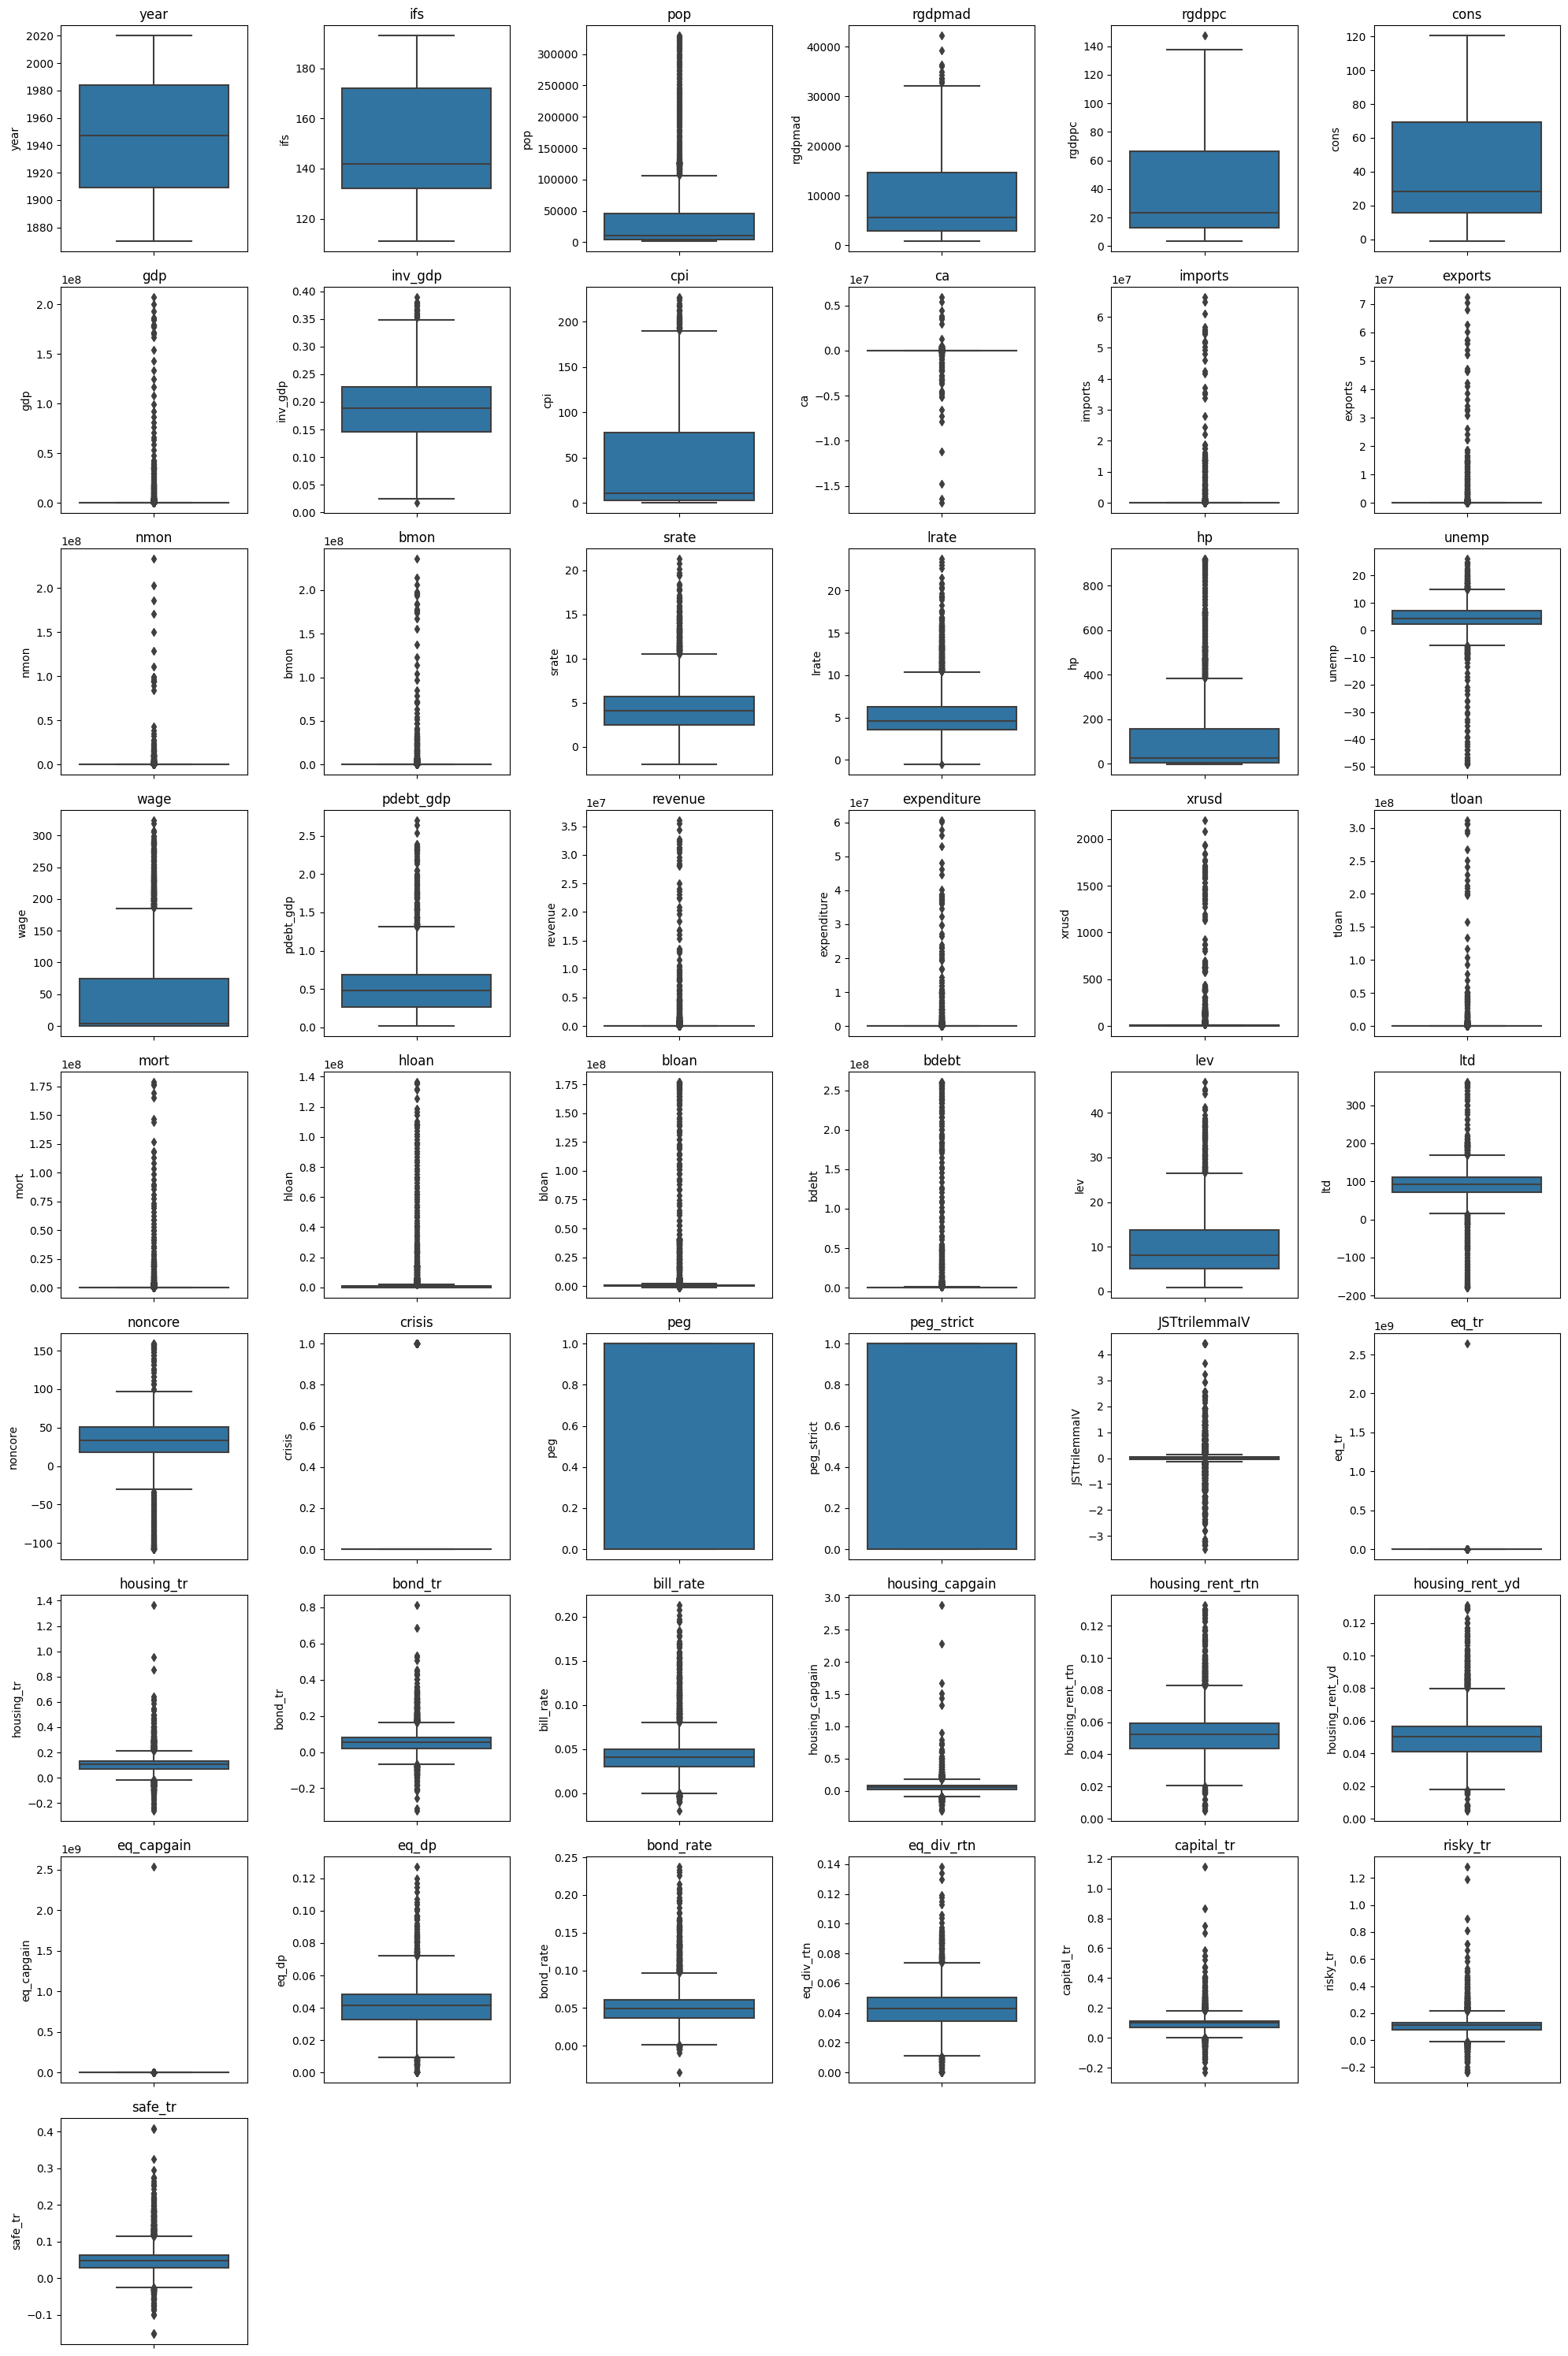

In [20]:
# Import necessary libraries for outlier analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numerical columns for outlier analysis
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Plot boxplots for numerical columns to visualize outliers
plt.figure(figsize=(20, 30))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(9, 6, i)
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.xlabel("")

plt.tight_layout()
plt.show()


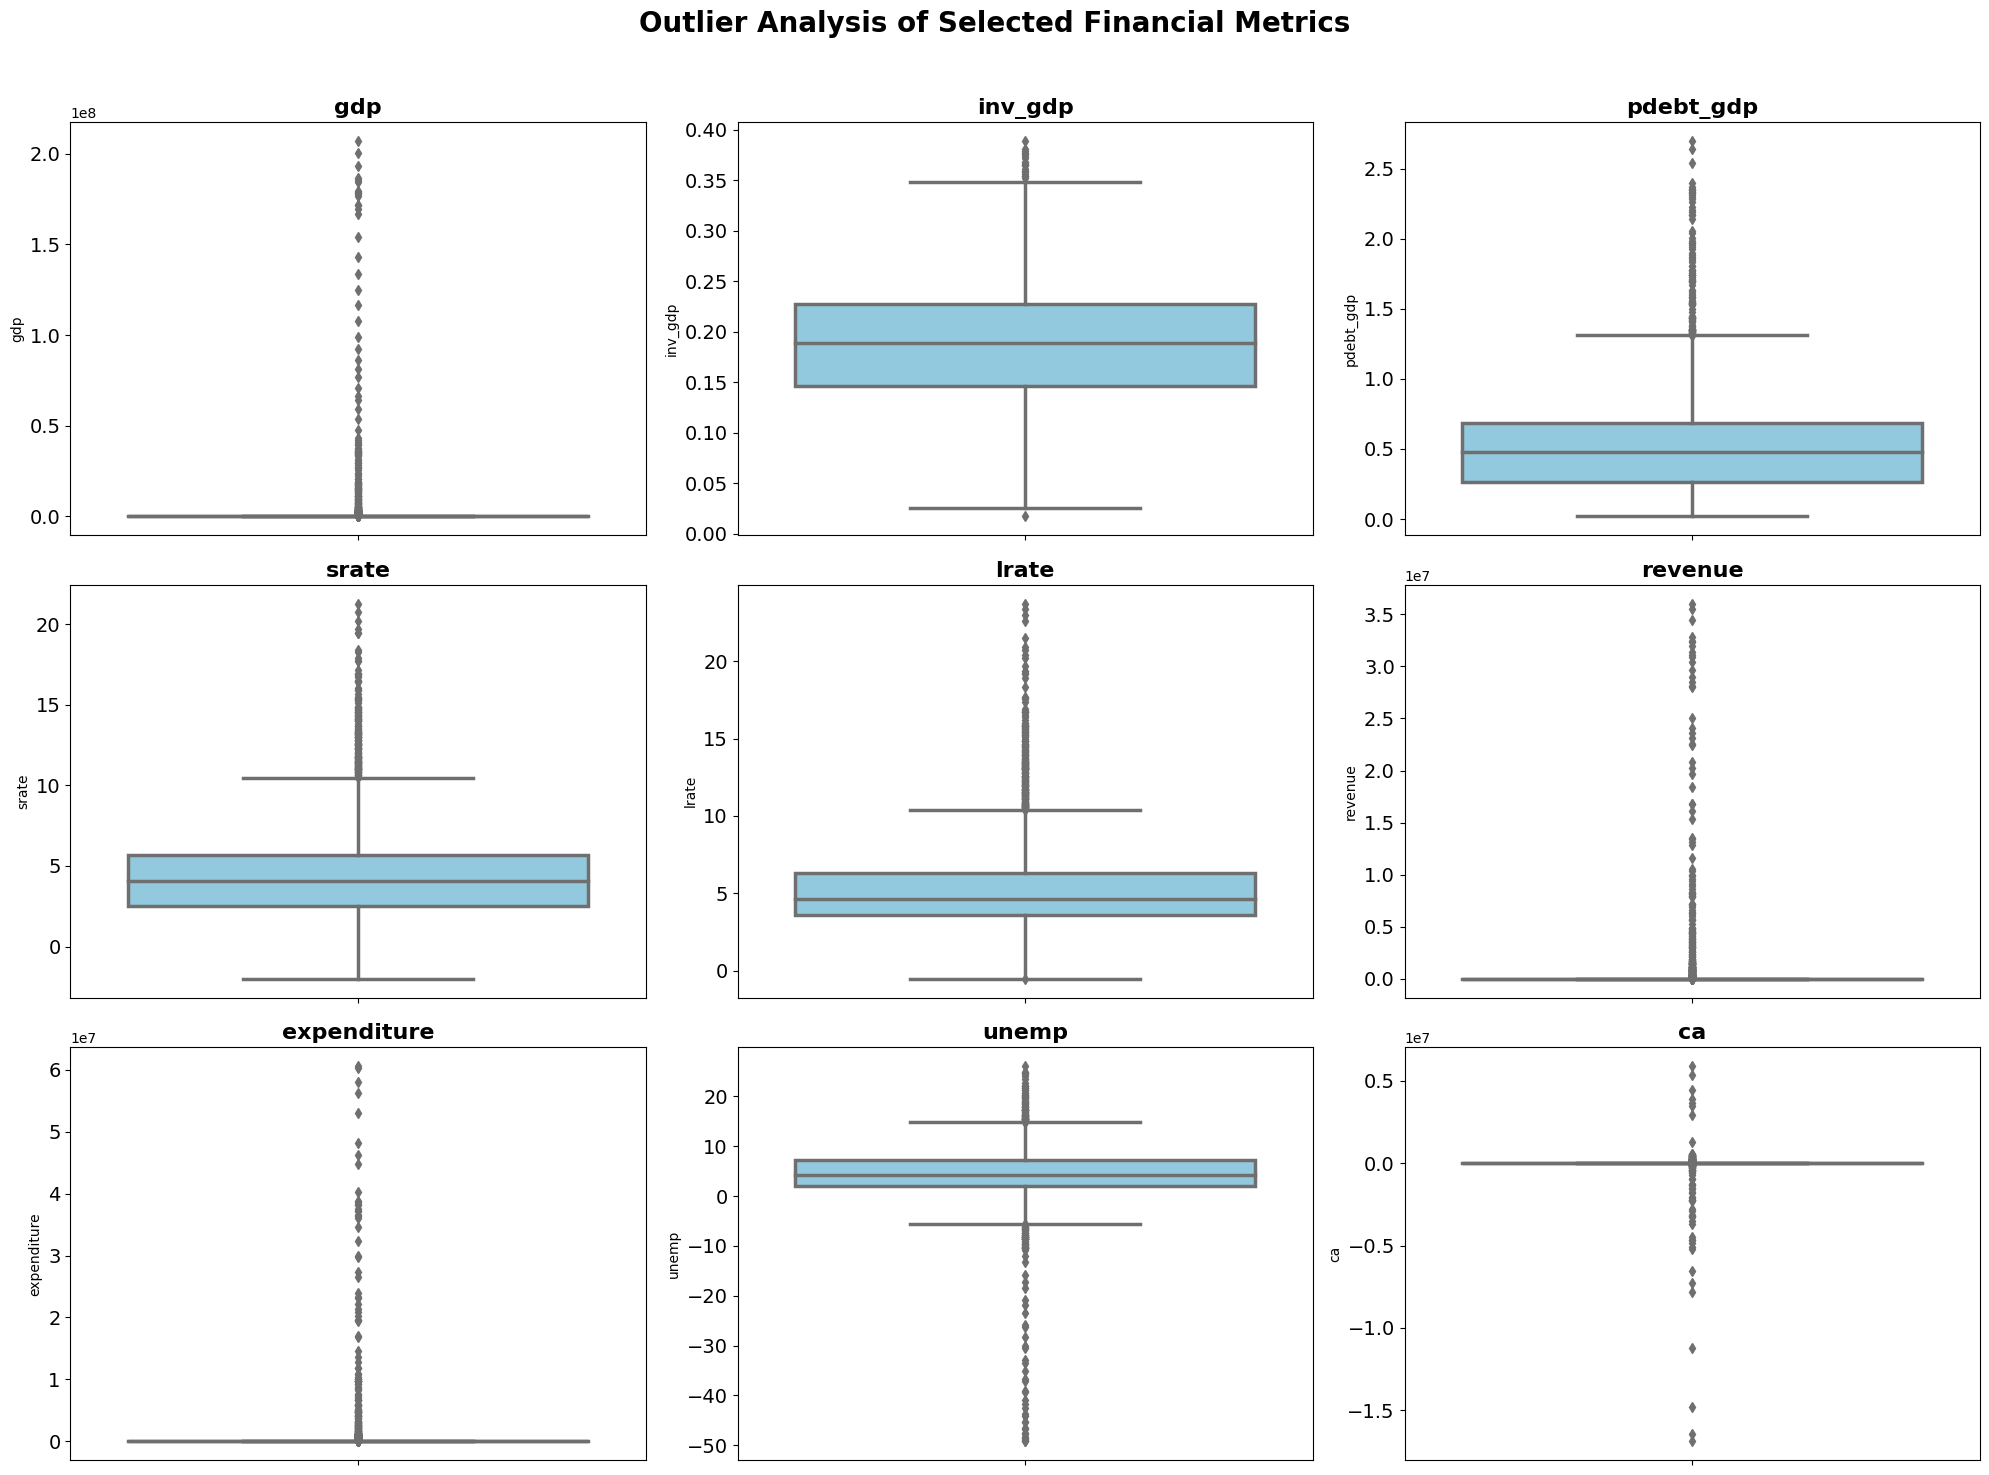

In [21]:
# Customize the plot for better visibility and a more modern look
plt.figure(figsize=(20, 15))
selected_columns = ['gdp', 'inv_gdp', 'pdebt_gdp', 'srate', 'lrate', 'revenue', 'expenditure', 'unemp', 'ca']
plt.suptitle('Outlier Analysis of Selected Financial Metrics', fontsize=20, fontweight='bold')

for i, col in enumerate(selected_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col], color='skyblue', linewidth=2.5)
    plt.title(col, fontsize=16, fontweight='bold')
    plt.tick_params(labelsize=14)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for title
plt.show()


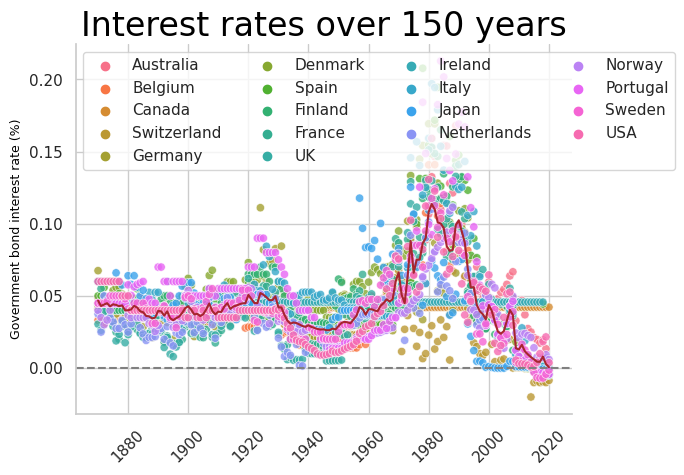

In [22]:
sns.set(style="whitegrid")

# Scatter plot (equivalent to geom_jitter in R)
sns.scatterplot(x='year', y='bill_rate', hue='country', data=df, alpha=0.8)

# Line of best fit (equivalent to geom_smooth in R)
sns.lineplot(x='year', y='bill_rate', data=df, color="#A7252E", ci=None)

# Add horizontal line (equivalent to geom_hline in R)
plt.axhline(0, color='gray', linestyle='--')

# Customizing the plot (equivalent to labs and theme in R)
plt.title("Interest rates over 150 years", fontsize=24, color='black')
plt.xlabel("")
plt.ylabel("Government bond interest rate (%)", fontsize=9, color='black')
plt.legend(title='', loc='upper left', ncol=4)
plt.xticks(rotation=45)

# Remove the right and top spines for aesthetics
sns.despine()

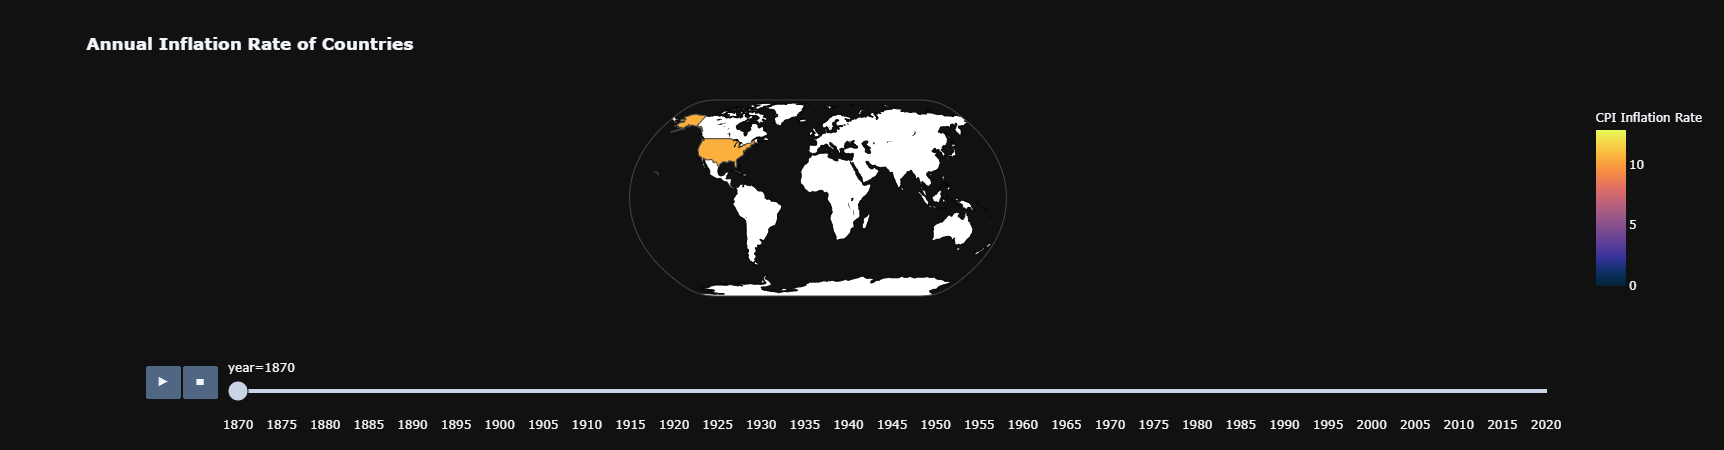

In [84]:
import plotly.express as px

fig = px.choropleth(
    df_jst,
    locations='country',
    animation_frame='year',
    labels={'cpi': 'CPI Inflation Rate', 'country': 'Country'},
    color='cpi',
    color_continuous_scale=px.colors.sequential.thermal,
    title='<b>Annual Inflation Rate of Countries',
    template='plotly_dark',
    hover_name='country',  # Show country names on hover
    projection='natural earth',  # Use a natural earth projection for the map
    scope='world',  # Set the map scope to world
)

fig.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="white")

fig.show()


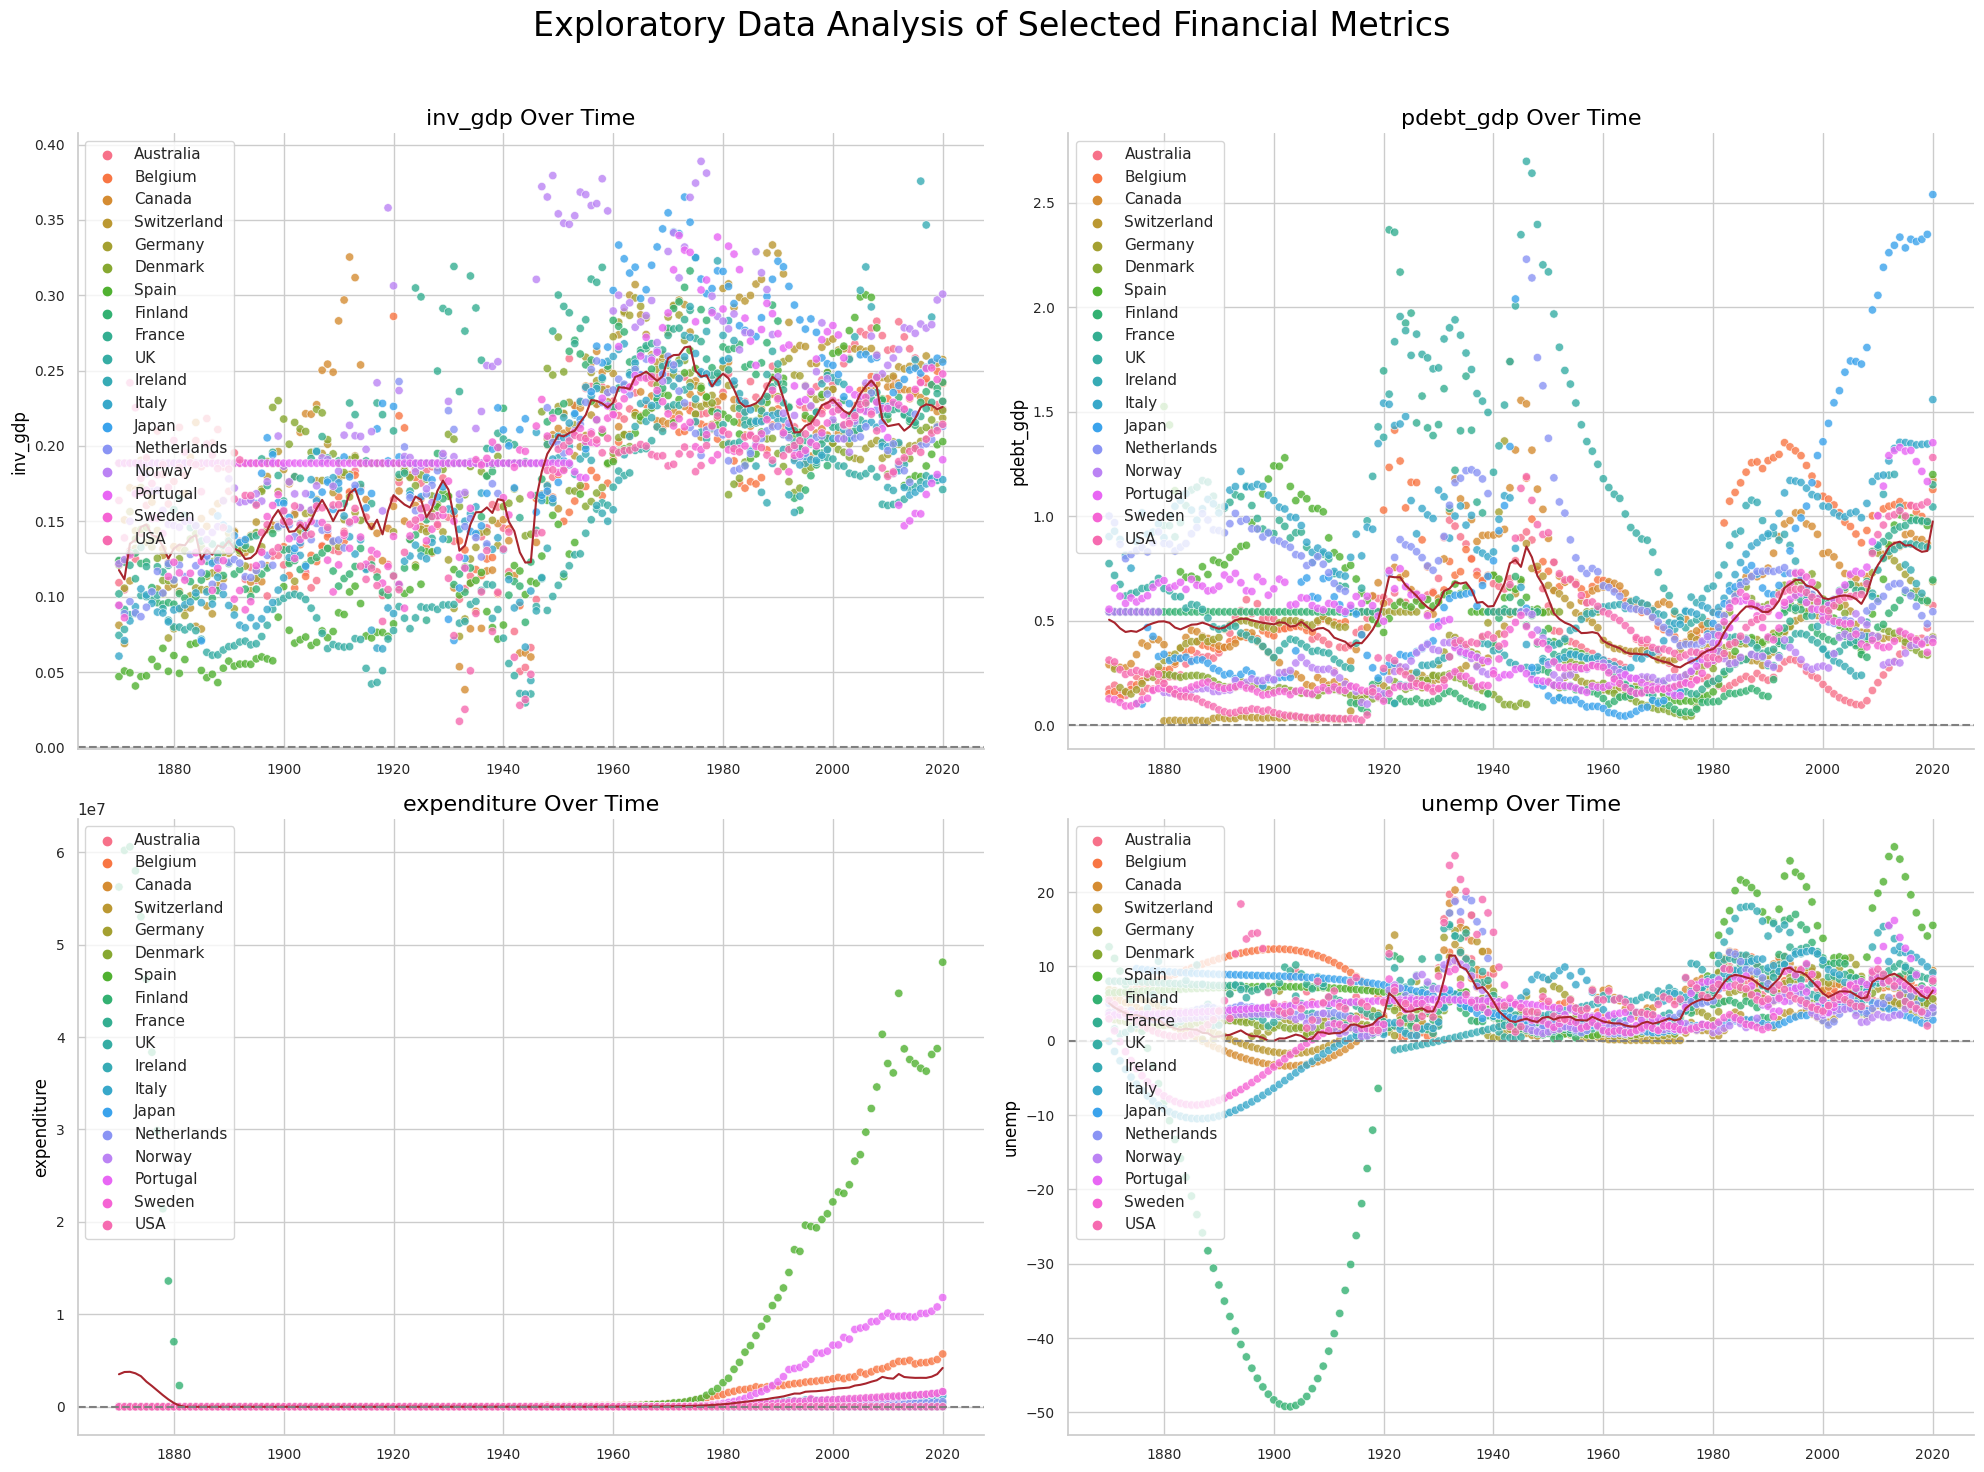

In [23]:
# Create 2x2 subplots with updated size for the remaining features
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle("Exploratory Data Analysis of Selected Financial Metrics", fontsize=24, color='black')
remaining_features = ['inv_gdp', 'pdebt_gdp', 'expenditure', 'unemp']
# Flatten the axes for easier iteration
axes = axes.flatten()

# Iterate through each subplot to plot the remaining features
for ax, feature in zip(axes, remaining_features):
    # Scatter plot with different marker
    sns.scatterplot(x='year', y=feature, hue='country', data=df, ax=ax, alpha=0.8, marker='o')
    
    # Line of best fit
    sns.lineplot(x='year', y=feature, data=df, color="#A7252E", ci=None, ax=ax)
    
    # Add horizontal line
    ax.axhline(0, color='gray', linestyle='--')
    
    # Customize the subplot
    ax.set_title(f"{feature} Over Time", fontsize=16, color='black')
    ax.set_xlabel("")
    ax.set_ylabel(f"{feature}", fontsize=12, color='black')
    ax.legend(title='', loc='upper left', ncol=1)
    ax.tick_params(labelsize=10)

# Adjust layout to make room for title
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Remove the right and top spines for aesthetics
sns.despine()

# Show the plot
plt.show()


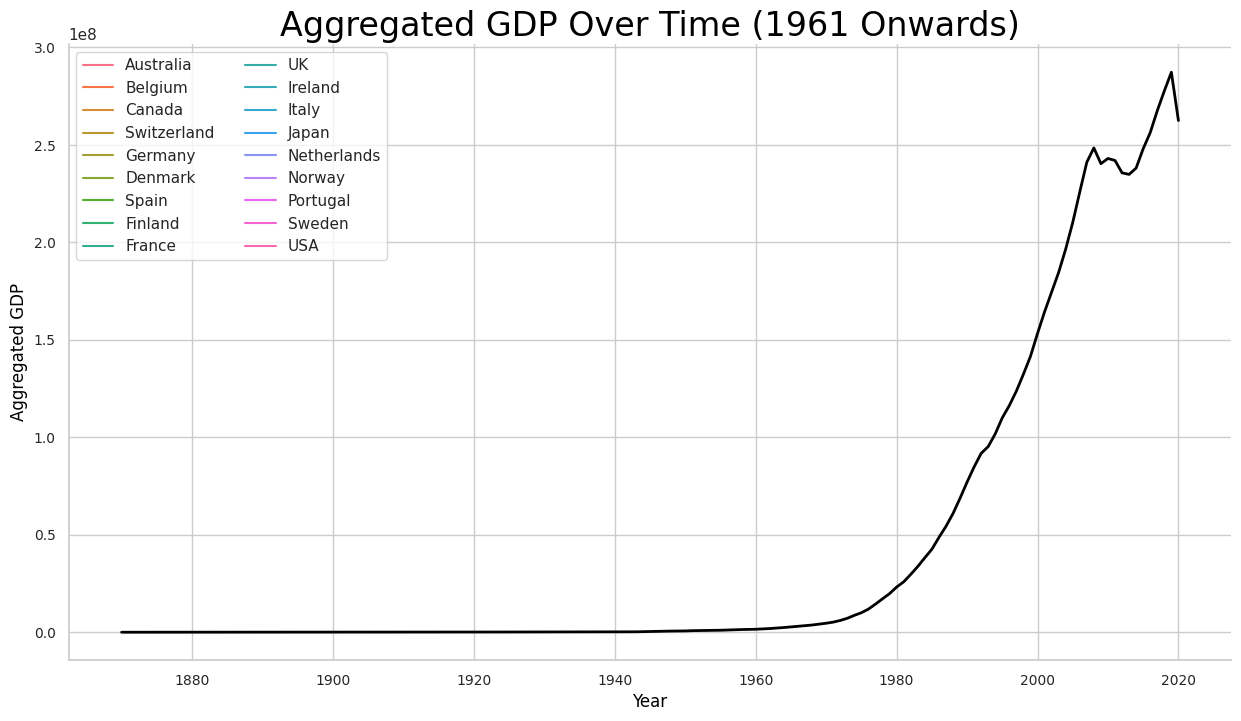

In [24]:
# Given that line plots are cluttered for multiple countries, let's try an area plot to show trends over time.
plt.figure(figsize=(15, 8))

# Create an area plot
sns.set_style("whitegrid")
sns.lineplot(x='year', y='gdp', hue='country', data=df, ci=None, estimator='sum', linewidth=0)
sns.lineplot(x='year', y='gdp', data=df, color="black", linewidth=2, ci=None, estimator='sum')

# Customize the plot
plt.title("Aggregated GDP Over Time (1961 Onwards)", fontsize=24, color='black')
plt.xlabel("Year", fontsize=12, color='black')
plt.ylabel("Aggregated GDP", fontsize=12, color='black')
plt.legend(title='', loc='upper left', ncol=2)
plt.tick_params(labelsize=10)

# Remove the right and top spines for aesthetics
sns.despine()

# Show the plot
plt.show()


### Data Transformation

#### Derived variables

In [25]:
# Calculate and add the derived variables to the cleaned DataFrame

# 1. Economic Growth Rate
df['Economic_Growth_Rate'] = df['gdp'].pct_change() * 100  # in percentage

# 2. Consumption to GDP Ratio
df['Consumption_to_GDP_Ratio'] = df['cons'] / df['gdp'].replace(0, np.nan)

# 3. Investment Fluctuation
df['Investment_Fluctuation'] = df['inv_gdp'].diff()

# 4. Interest Rate Spread 
low_risk_rate = 4.27 / 100  # Example low-risk rate, in decimal
df['Interest_Rate_Spread'] = df['bond_rate'] - low_risk_rate

# Show the first few rows of the updated DataFrame to confirm the addition of derived variables
df.head()


year    country  ifs     pop      rgdpmad     rgdppc       cons     gdp  \
0  1870  Australia  193  1775.0  3273.239437  13.836157  21.449734  208.78   
1  1871  Australia  193  1675.0  3298.507463  13.936864  19.930801  211.56   
2  1872  Australia  193  1722.0  3553.426249  15.044247  21.085006  227.40   
3  1873  Australia  193  1769.0  3823.629169  16.219443  23.254910  266.54   
4  1874  Australia  193  1822.0  3834.796926  16.268228  23.458050  287.58   

    inv_gdp       cpi         ca  imports  exports  nmon  bmon  srate  \
0  0.109266  2.708333  -6.147594     36.0     37.0  23.3  54.3   4.88   
1  0.104579  2.666667   5.260774     34.0     46.0  27.2  59.5   4.60   
2  0.130438  2.541667   7.867636     38.0     53.0  36.2  68.5   4.60   
3  0.124986  2.541667 -11.047833     49.0     50.0  38.6  73.7   4.40   
4  0.141960  2.666667  -5.563959     49.0     54.0  37.9  79.3   4.50   

      lrate        hp  unemp      wage  pdebt_gdp  revenue  expenditure  \
0  4.911817  0.492253    3.9  0.448118   0.172568     22.0          7.8   
1  4.844633  0.469877    3.9  0.439417   0.191799     22.0          7.8   
2  4.737350  0.484794    3.9  0.452469   0.154920     22.0          7.8   
3  4.671958  0.469877    3.9  0.491625   0.142692     22.0          7.8   
4  4.653317  0.566836    3.9  0.509028   0.194322     22.0          7.8   

      xrusd   tloan   mort    hloan    bloan        bdebt        lev  \
0  0.366946  54.792  1.680  284.786  1263.62  2656.160645  25.016659   
1  0.369146  53.748  1.766  284.786  1263.62  2656.160645  23.983004   
2  0.369239  55.822  1.470  284.786  1263.62  2656.160645  22.445646   
3  0.362405  65.380  1.364  284.786  1263.62  2656.160645  21.004997   
4  0.372223  71.478  1.434  284.786  1263.62  2656.160645  20.974375   

          ltd    noncore  crisis  peg  peg_strict peg_type peg_base  \
0  119.832039  32.928768     0.0  1.0         1.0      PEG      GBR   
1  107.037880  30.213655     0.0  1.0         1.0      PEG      GBR   
2   94.909546  26.860411     0.0  1.0         1.0      PEG      GBR   
3  101.708099  28.645016     0.0  1.0         1.0      PEG      GBR   
4  102.079346  28.298048     0.0  1.0         1.0      PEG      GBR   

   JSTtrilemmaIV     eq_tr  housing_tr   bond_tr  bill_rate  housing_capgain  \
0          -0.42 -0.004904    0.131751  0.019968     0.0488        -0.045456   
1          -0.42  0.110193    0.131751  0.019968     0.0460        -0.045456   
2           1.27  0.176749    0.131751  0.019968     0.0460         0.031747   
3           0.59  0.151686    0.131751  0.019968     0.0440        -0.030770   
4          -1.08  0.191481    0.131751  0.019968     0.0450         0.206350   

   housing_rent_rtn  housing_rent_yd  eq_capgain     eq_dp  bond_rate  \
0           0.03586         0.032722   -0.070045  0.071417   0.049118   
1           0.03586         0.032722    0.041654  0.065466   0.048446   
2           0.03586         0.032722    0.108945  0.062997   0.047373   
3           0.03586         0.032722    0.083086  0.064484   0.046720   
4           0.03586         0.032722    0.119389  0.063503   0.046533   

   eq_div_rtn  capital_tr  risky_tr   safe_tr  Economic_Growth_Rate  \
0    0.066415    0.070633  0.096968  0.025484                   NaN   
1    0.068193    0.070633  0.096968  0.025484              1.331545   
2    0.069861    0.070633  0.096968  0.025484              7.487238   
3    0.069842    0.070633  0.096968  0.025484             17.211961   
4    0.071085    0.070633  0.096968  0.025484              7.893750   

   Consumption_to_GDP_Ratio  Investment_Fluctuation  Interest_Rate_Spread  
0                  0.102738                     NaN              0.006418  
1                  0.094209               -0.004687              0.005746  
2                  0.092722                0.025859              0.004673  
3                  0.087247               -0.005452              0.004020  
4                  0.081571                0.016974      

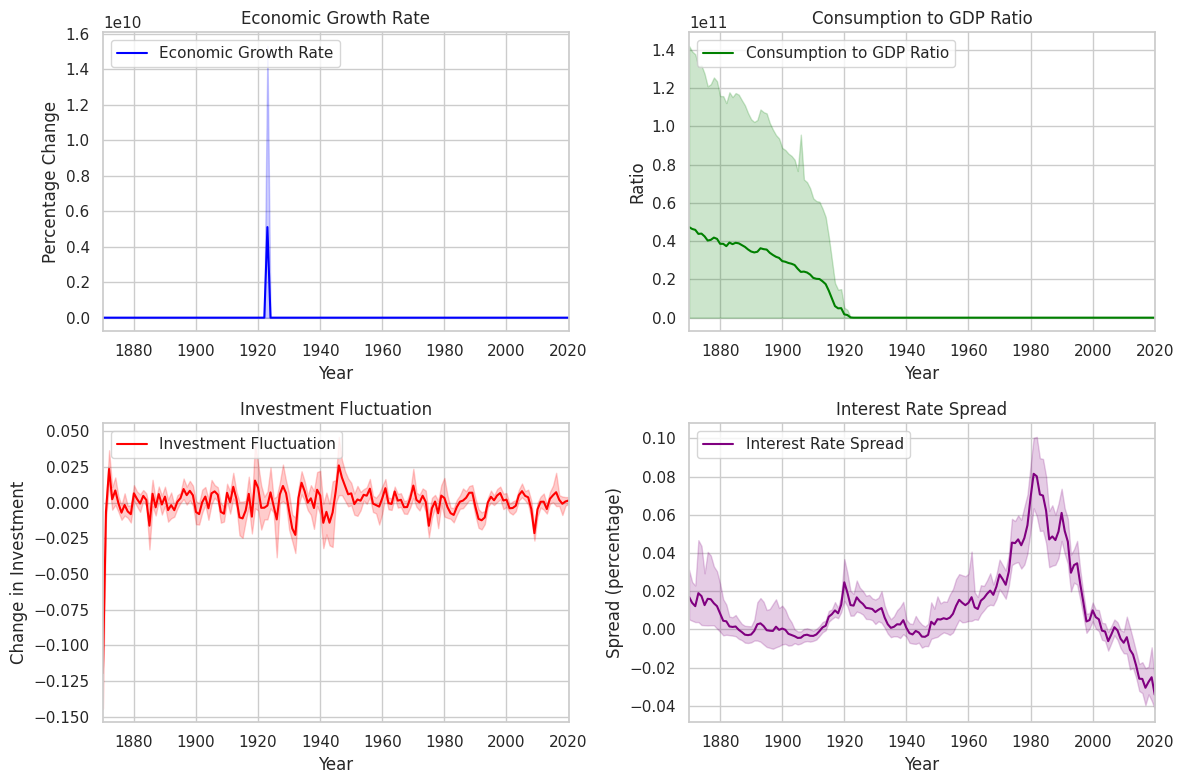

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot Economic Growth Rate
sns.lineplot(data=df, x='year', y='Economic_Growth_Rate', ax=axes[0, 0], label='Economic Growth Rate', color='blue')
axes[0, 0].set_title('Economic Growth Rate')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Percentage Change')

# Plot Consumption to GDP Ratio
sns.lineplot(data=df, x='year', y='Consumption_to_GDP_Ratio', ax=axes[0, 1], label='Consumption to GDP Ratio', color='green')
axes[0, 1].set_title('Consumption to GDP Ratio')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Ratio')

# Plot Investment Fluctuation
sns.lineplot(data=df, x='year', y='Investment_Fluctuation', ax=axes[1, 0], label='Investment Fluctuation', color='red')
axes[1, 0].set_title('Investment Fluctuation')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Change in Investment')

# Plot Interest Rate Spread
sns.lineplot(data=df, x='year', y='Interest_Rate_Spread', ax=axes[1, 1], label='Interest Rate Spread', color='purple')
axes[1, 1].set_title('Interest Rate Spread')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Spread (percentage)')

# Set x-axis limits based on the 'year' column
min_year = df['year'].min()
max_year = df['year'].max()
for ax in axes.flat:
    ax.set_xlim(min_year, max_year)

# Add legends
for ax in axes.flat:
    ax.legend(loc='upper left')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [27]:
per_null = round(100*(df.isnull().sum()/len(df.index)), 2)
per_null[per_null>0].sort_values(ascending= False)

Economic_Growth_Rate      0.04
Investment_Fluctuation    0.04
dtype: float64

In [28]:
df.dropna(axis='rows', inplace=True,  subset=['Economic_Growth_Rate','Investment_Fluctuation'])

In [29]:
# Calculate and add the Financial Stability Index (FSI) to the DataFrame

# Normalize the selected variables
normalized_growth_rate = (df['Economic_Growth_Rate'] - df['Economic_Growth_Rate'].mean()) / df['Economic_Growth_Rate'].std()
normalized_investment_fluctuation = (df['Investment_Fluctuation'] - df['Investment_Fluctuation'].mean()) / df['Investment_Fluctuation'].std()
normalized_interest_rate_spread = (df['Interest_Rate_Spread'] - df['Interest_Rate_Spread'].mean()) / df['Interest_Rate_Spread'].std()
normalized_consumption_to_gdp_ratio = (df['Consumption_to_GDP_Ratio'] - df['Consumption_to_GDP_Ratio'].mean()) / df['Consumption_to_GDP_Ratio'].std()

# Define weights (for demonstration, we set all weights to 0.25, but these should ideally be determined through further analysis)
w1, w2, w3, w4 = 0.25, 0.25, 0.25, 0.25

# Calculate FSI
df['FSI'] = w1 * normalized_growth_rate + w2 * normalized_investment_fluctuation + w3 * normalized_interest_rate_spread + w4 * normalized_consumption_to_gdp_ratio

# Calculate and add the Macro-Economic Risk Indicator (MERI) to the DataFrame

# Calculate the first differences for the selected variables
delta_real_gdp = df['rgdppc'].diff()
delta_investment_to_gdp = df['inv_gdp'].diff()
delta_bond_rate = df['bond_rate'].diff()
delta_consumption_to_gdp = df['Consumption_to_GDP_Ratio'].diff()

# Apply smoothing to handle infinity values while calculating MERI
epsilon = 1e-9  # Small smoothing constant

# Calculate MERI 
df['MERI'] = abs(delta_real_gdp / (delta_investment_to_gdp + epsilon)) + abs(delta_bond_rate / (delta_consumption_to_gdp + epsilon))


df.head()


year    country  ifs     pop      rgdpmad     rgdppc       cons     gdp  \
1  1871  Australia  193  1675.0  3298.507463  13.936864  19.930801  211.56   
2  1872  Australia  193  1722.0  3553.426249  15.044247  21.085006  227.40   
3  1873  Australia  193  1769.0  3823.629169  16.219443  23.254910  266.54   
4  1874  Australia  193  1822.0  3834.796926  16.268228  23.458050  287.58   
5  1875  Australia  193  1874.0  4138.207044  17.592107  25.669505  300.74   

    inv_gdp       cpi         ca  imports  exports  nmon  bmon  srate  \
1  0.104579  2.666667   5.260774     34.0     46.0  27.2  59.5    4.6   
2  0.130438  2.541667   7.867636     38.0     53.0  36.2  68.5    4.6   
3  0.124986  2.541667 -11.047833     49.0     50.0  38.6  73.7    4.4   
4  0.141960  2.666667  -5.563959     49.0     54.0  37.9  79.3    4.5   
5  0.160564  2.750000  -7.908737     50.0     52.0  37.5  88.5    4.6   

      lrate        hp  unemp      wage  pdebt_gdp  revenue  expenditure  \
1  4.844633  0.469877    3.9  0.439417   0.191799     22.0          7.8   
2  4.737350  0.484794    3.9  0.452469   0.154920     22.0          7.8   
3  4.671958  0.469877    3.9  0.491625   0.142692     22.0          7.8   
4  4.653317  0.566836    3.9  0.509028   0.194322     22.0          7.8   
5  4.507325  0.566836    3.9  0.522080   0.233687     22.0          7.8   

      xrusd   tloan   mort    hloan    bloan        bdebt        lev  \
1  0.369146  53.748  1.766  284.786  1263.62  2656.160645  23.983004   
2  0.369239  55.822  1.470  284.786  1263.62  2656.160645  22.445646   
3  0.362405  65.380  1.364  284.786  1263.62  2656.160645  21.004997   
4  0.372223  71.478  1.434  284.786  1263.62  2656.160645  20.974375   
5  0.360926  79.954  1.564  284.786  1263.62  2656.160645  19.600180   

          ltd    noncore  crisis  peg  peg_strict peg_type peg_base  \
1  107.037880  30.213655     0.0  1.0         1.0      PEG      GBR   
2   94.909546  26.860411     0.0  1.0         1.0      PEG      GBR   
3  101.708099  28.645016     0.0  1.0         1.0      PEG      GBR   
4  102.079346  28.298048     0.0  1.0         1.0      PEG      GBR   
5  101.909348  28.049749     0.0  1.0         1.0      PEG      GBR   

   JSTtrilemmaIV     eq_tr  housing_tr   bond_tr  bill_rate  housing_capgain  \
1          -0.42  0.110193    0.131751  0.019968      0.046        -0.045456   
2           1.27  0.176749    0.131751  0.019968      0.046         0.031747   
3           0.59  0.151686    0.131751  0.019968      0.044        -0.030770   
4          -1.08  0.191481    0.131751  0.019968      0.045         0.206350   
5          -0.51  0.124408    0.131751  0.019968      0.046         0.000000   

   housing_rent_rtn  housing_rent_yd  eq_capgain     eq_dp  bond_rate  \
1           0.03586         0.032722    0.041654  0.065466   0.048446   
2           0.03586         0.032722    0.108945  0.062997   0.047373   
3           0.03586         0.032722    0.083086  0.064484   0.046720   
4           0.03586         0.032722    0.119389  0.063503   0.046533   
5           0.03586         0.032722    0.057059  0.063643   0.045073   

   eq_div_rtn  capital_tr  risky_tr   safe_tr  Economic_Growth_Rate  \
1    0.068193    0.070633  0.096968  0.025484              1.331545   
2    0.069861    0.070633  0.096968  0.025484              7.487238   
3    0.069842    0.070633  0.096968  0.025484             17.211961   
4    0.071085    0.070633  0.096968  0.025484              7.893750   
5    0.067274    0.070633  0.096968  0.025484              4.576118   

   Consumption_to_GDP_Ratio  Investment_Fluctuation  Interest_Rate_Spread  \
1                  0.094209               -0.004687              0.005746   
2                  0.092722                0.025859              0.004673   
3                  0.087247               -0.005452              0.004020   
4                  0.081571                0.016974              0.003833   
5                  0.085354                0.018604 

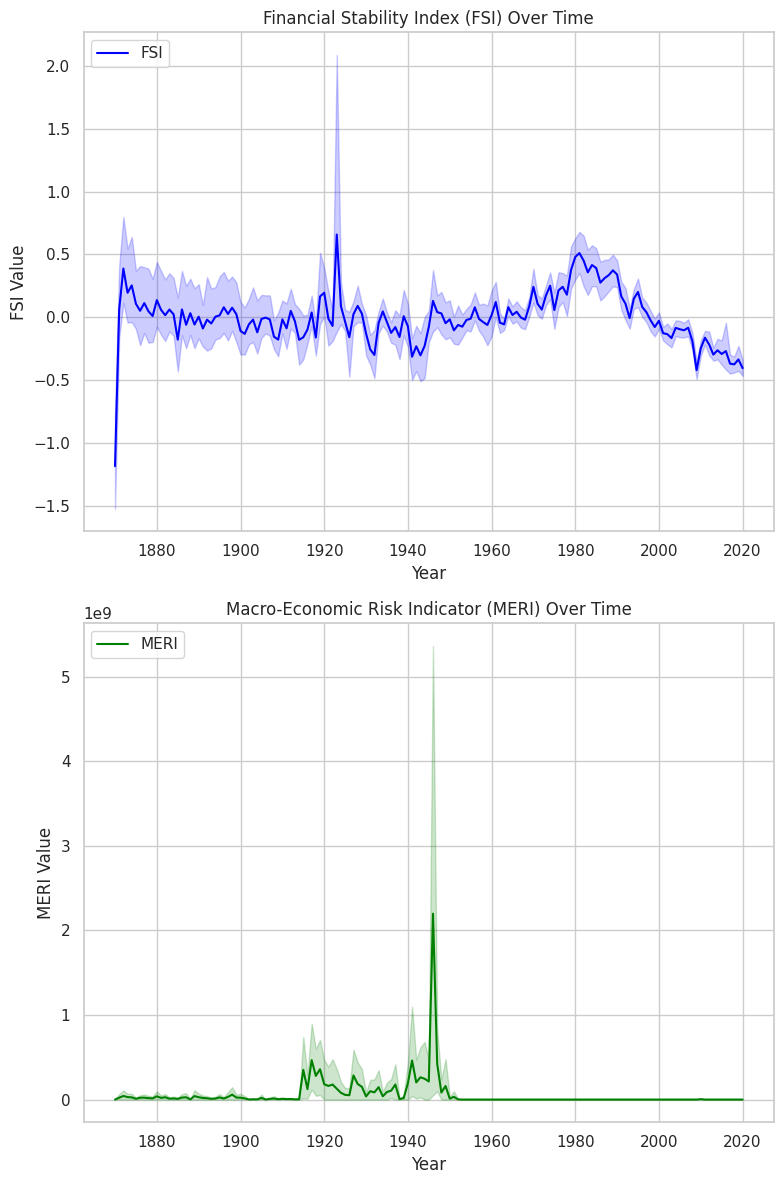

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 12))

# Plot FSI
sns.lineplot(data=df, x='year', y='FSI', ax=axes[0], label='FSI', color='blue')
axes[0].set_title('Financial Stability Index (FSI) Over Time')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('FSI Value')
axes[0].legend(loc='upper left')

# Plot MERI
sns.lineplot(data=df, x='year', y='MERI', ax=axes[1], label='MERI', color='green')
axes[1].set_title('Macro-Economic Risk Indicator (MERI) Over Time')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('MERI Value')
axes[1].legend(loc='upper left')

# Adjust layout
plt.tight_layout()

# Save the combined plot as an image (optional)
plt.savefig('combined_plot.png')

# Show the combined plot
plt.show()


In [31]:
# Function to perform Fourier Transform and return the transformed data
def fourier_transform_and_return(data, column_name):
    # Apply the Fast Fourier Transform (FFT)
    fft_output = np.fft.fft(data)
    
    # Take only the real part of the FFT output (ignore the imaginary part for simplicity)
    real_fft_output = np.real(fft_output)
    
    return real_fft_output

# Create a new DataFrame to hold the Fourier Transformed columns
df_fourier = pd.DataFrame()

# Perform Fourier Transform for each selected column and add to new DataFrame
selected_columns_fft = ['rgdpmad', 'rgdppc', 'cons', 'gdp', 'inv_gdp', 'bond_rate']
for column in selected_columns_fft:
    # Drop NaN values from the column before applying Fourier Transform
    data = df[column].reset_index(drop=True)
    out = fourier_transform_and_return(data, column)
    df_fourier[f'Fourier_{column}'] = out
    df[column] = out

# Align the Fourier Transformed DataFrame with the original DataFrame by setting the same index
df_fourier.index = df.index

# Merge the Fourier Transformed columns into the original DataFrame
df = pd.concat([df, df_fourier], axis=1)

# Show the first few rows of the updated DataFrame to confirm the addition
df_fourier.head()



Fourier_rgdpmad  Fourier_rgdppc   Fourier_cons   Fourier_gdp  \
1     2.423428e+07   105685.612682  112143.974024  6.482680e+09   
2     1.082088e+06     1967.449173    5209.526567 -2.492896e+09   
3     4.868773e+05     -525.717869     923.919677  1.261195e+09   
4    -2.493039e+04    -1271.781640     429.355626  1.121827e+09   
5     1.896684e+06     4671.505131    3596.477477 -5.455685e+09   

   Fourier_inv_gdp  Fourier_bond_rate  
1       497.604751         143.456159  
2        11.292663          -5.484112  
3       -16.316107           1.777252  
4       -15.017110           3.211072  
5         7.401532         -11.272566

In [32]:
df['peg_base'].value_counts()

peg_base
GBR       888
USA       707
DEU       686
HYBRID    357
Name: count, dtype: int64

In [33]:
from sklearn.preprocessing import LabelEncoder
labelencoder_peg_type = LabelEncoder()
labelencoder_peg_base = LabelEncoder()
labelencoder_country= LabelEncoder()
df['peg_type'] = df['peg_type'].astype(str)
df['peg_base'] = df['peg_base'].astype(str)
df['country'] = df['country'].astype(str)
df['peg_type'] = labelencoder_peg_type.fit_transform(df['peg_type'])
df['peg_base'] = labelencoder_peg_base.fit_transform(df['peg_base'])
df['country'] = labelencoder_peg_base.fit_transform(df['country'])
print(df['peg_type'].value_counts())
print("******************")
print(df['peg_base'].value_counts())
print("******************")
print(df['country'].value_counts())

peg_type
2    1565
1     948
0     125
Name: count, dtype: int64
******************
peg_base
1    888
3    707
0    686
2    357
Name: count, dtype: int64
******************
country
16    151
4     151
14    151
12    151
8     151
1     151
5     151
17    151
13    151
3     151
15    151
2     151
6     150
0     150
9     145
11    145
10    139
7      97
Name: count, dtype: int64


In [34]:
df['peg_base'].value_counts()

peg_base
1    888
3    707
0    686
2    357
Name: count, dtype: int64

In [35]:
per_null = round(100*(df.isnull().sum()/len(df.index)), 2)
per_null[per_null>0].sort_values(ascending= False)

MERI    0.04
dtype: float64

In [36]:
# impute missing values with 0

per_null = pd.DataFrame(per_null[per_null>0])
per_null.reset_index(inplace=True)
zero_impute2 = per_null['index'].to_list()
df[zero_impute2] =df[zero_impute2].apply(lambda x: x.fillna(0))


### Class Imbalance

In [37]:
# Import necessary libraries
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split

# Define the features and target variable
X = df.drop(columns=['crisis'])
y = df['crisis']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the ADASYN object
adasyn = ADASYN(sampling_strategy='auto', random_state=42, n_neighbors=5)

# Apply ADASYN to the training dataset
X_resampled_adasyn, y_resampled_adasyn = adasyn.fit_resample(X_train, y_train)

# Check the new class distribution
new_class_distribution_adasyn = pd.Series(y_resampled_adasyn).value_counts(normalize=True) * 100
new_class_distribution_adasyn

crisis
1.0    50.364609
0.0    49.635391
Name: proportion, dtype: float64

In [38]:
# Combine the resampled features and target variable into a new DataFrame
df_resampled_adasyn = pd.DataFrame(X_resampled_adasyn, columns=df.drop('crisis', axis=1).columns)
df_resampled_adasyn['crisis'] = y_resampled_adasyn

# Show the new DataFrame
df_resampled_adasyn.head(300)


year  country  ifs           pop        rgdpmad      rgdppc        cons  \
0    1928       14  144   6097.000000 -204243.797730 -932.907118 -630.439760   
1    2009        2  156  33595.161089  -11446.372419  -55.951494  -52.474633   
2    1926       15  146   3932.000000  -84715.052805 -375.909761 -212.774738   
3    1947        0  193   7578.000000  -81863.903283 -229.806856   23.832920   
4    1940       15  146   4226.000000   42399.009281  228.626370   97.636855   
..    ...      ...  ...           ...            ...         ...         ...   
295  1950        2  156  14011.420000  -35814.124946 -105.525016  -38.969198   
296  1893       16  112  38490.000000  -17070.816964  -76.122482 -177.730084   
297  1999        6  134  82046.000000   17568.177088  127.731074   38.957974   
298  2013        5  132  65669.372882  -37092.112589 -144.153648 -103.718880   
299  1995       11  142   4359.101000   28754.823327  124.173949  -33.804995   

              gdp   inv_gdp         cpi            ca        imports  \
0   -1.330323e+08 -0.693573    5.632411     72.921000    1708.000000   
1   -1.519302e+08 -0.242260  146.075782    -42.675391     373.984200   
2   -1.492160e+07 -2.393344   20.394640    278.000000    2415.000000   
3    9.982274e+08  4.220875    5.916667    -91.000000     416.000000   
4   -8.771448e+07 -0.584992   19.009820   -734.027632    1854.000000   
..            ...       ...         ...           ...            ...   
295  2.772083e+08 -0.345428   15.944100     -0.296540       3.279174   
296 -7.236093e+07 -0.095446    2.052014      0.056700       0.372000   
297  1.415646e+08  0.155971  124.149454    -61.117049     869.947317   
298  8.886196e+07  0.053565  147.505284    -70.828032    3341.818853   
299  7.387409e+07 -0.333582  112.457196  33067.327000  208627.000000   

           exports          nmon           bmon     srate     lrate  \
0      1575.000000    518.302900    6781.630163  4.041667  4.618333   
1       367.210800    506.972000     992.156000  0.350000  3.890833   
2      1836.000000   2542.712927    8055.800000  3.500000  4.800000   
3       618.000000   1395.000000    3045.900000  1.250000  3.170000   
4      1316.000000   8422.483916   12266.000000  1.500000  4.060000   
..             ...           ...            ...       ...       ...   
295       3.288624      4.190000       8.378100  0.548333  2.857500   
296       0.280000      0.136315       0.689360  2.130000  2.600000   
297     997.490902   1063.568619    2667.556537  2.732000  4.490833   
298    2808.676683   5241.452833   10792.840976  0.043067  2.204350   
299  265883.000000  43391.000000  521102.700000  5.455833  6.823330   

             hp     unemp        wage  pdebt_gdp        revenue  \
0      4.349567  4.400000    1.082927   0.185734     707.331000   
1    217.622631  8.344000  170.837047   0.833014     229.536000   
2     10.019692  3.035865    6.273958   0.244567     456.700000   
3      1.551382  2.900000    2.384164   0.886607     862.000000   
4      9.288664  3.086959    6.227020   0.378043     932.900000   
..          ...       ...         ...        ...            ...   
295    5.901716  2.837942    7.385895   0.894348       2.448616   
296   43.275902  7.500000    0.571078   0.473892       0.100950   
297  121.340810  8.855000  134.364504   0.601394     479.129500   
298  252.444591  9.920600  177.595305   0.934132    2779.591549   
299  110.676203  6.307300  119.472825   0.348000  411684.000000   

       expenditure     xrusd          tloan           mort          hloan  \
0       712.077000  3.736188    5397.758800    2385.647000    2385.647000   
1       259.125000  1.046600    1268.502250     613.882000     956.081000   
2       382.800000  5.177900   11186.000000    5832.000000    5670.910000   
3       956.000000  0.623053     731.406337      39.935392     284.786000   
4      1806.800000  4.409900   12660.000000    9646.000000    9379.550000   
..             ...       ...            ...            ... 

In [39]:
df_resampled_adasyn['crisis'].value_counts()

crisis
1.0    2072
0.0    2042
Name: count, dtype: int64

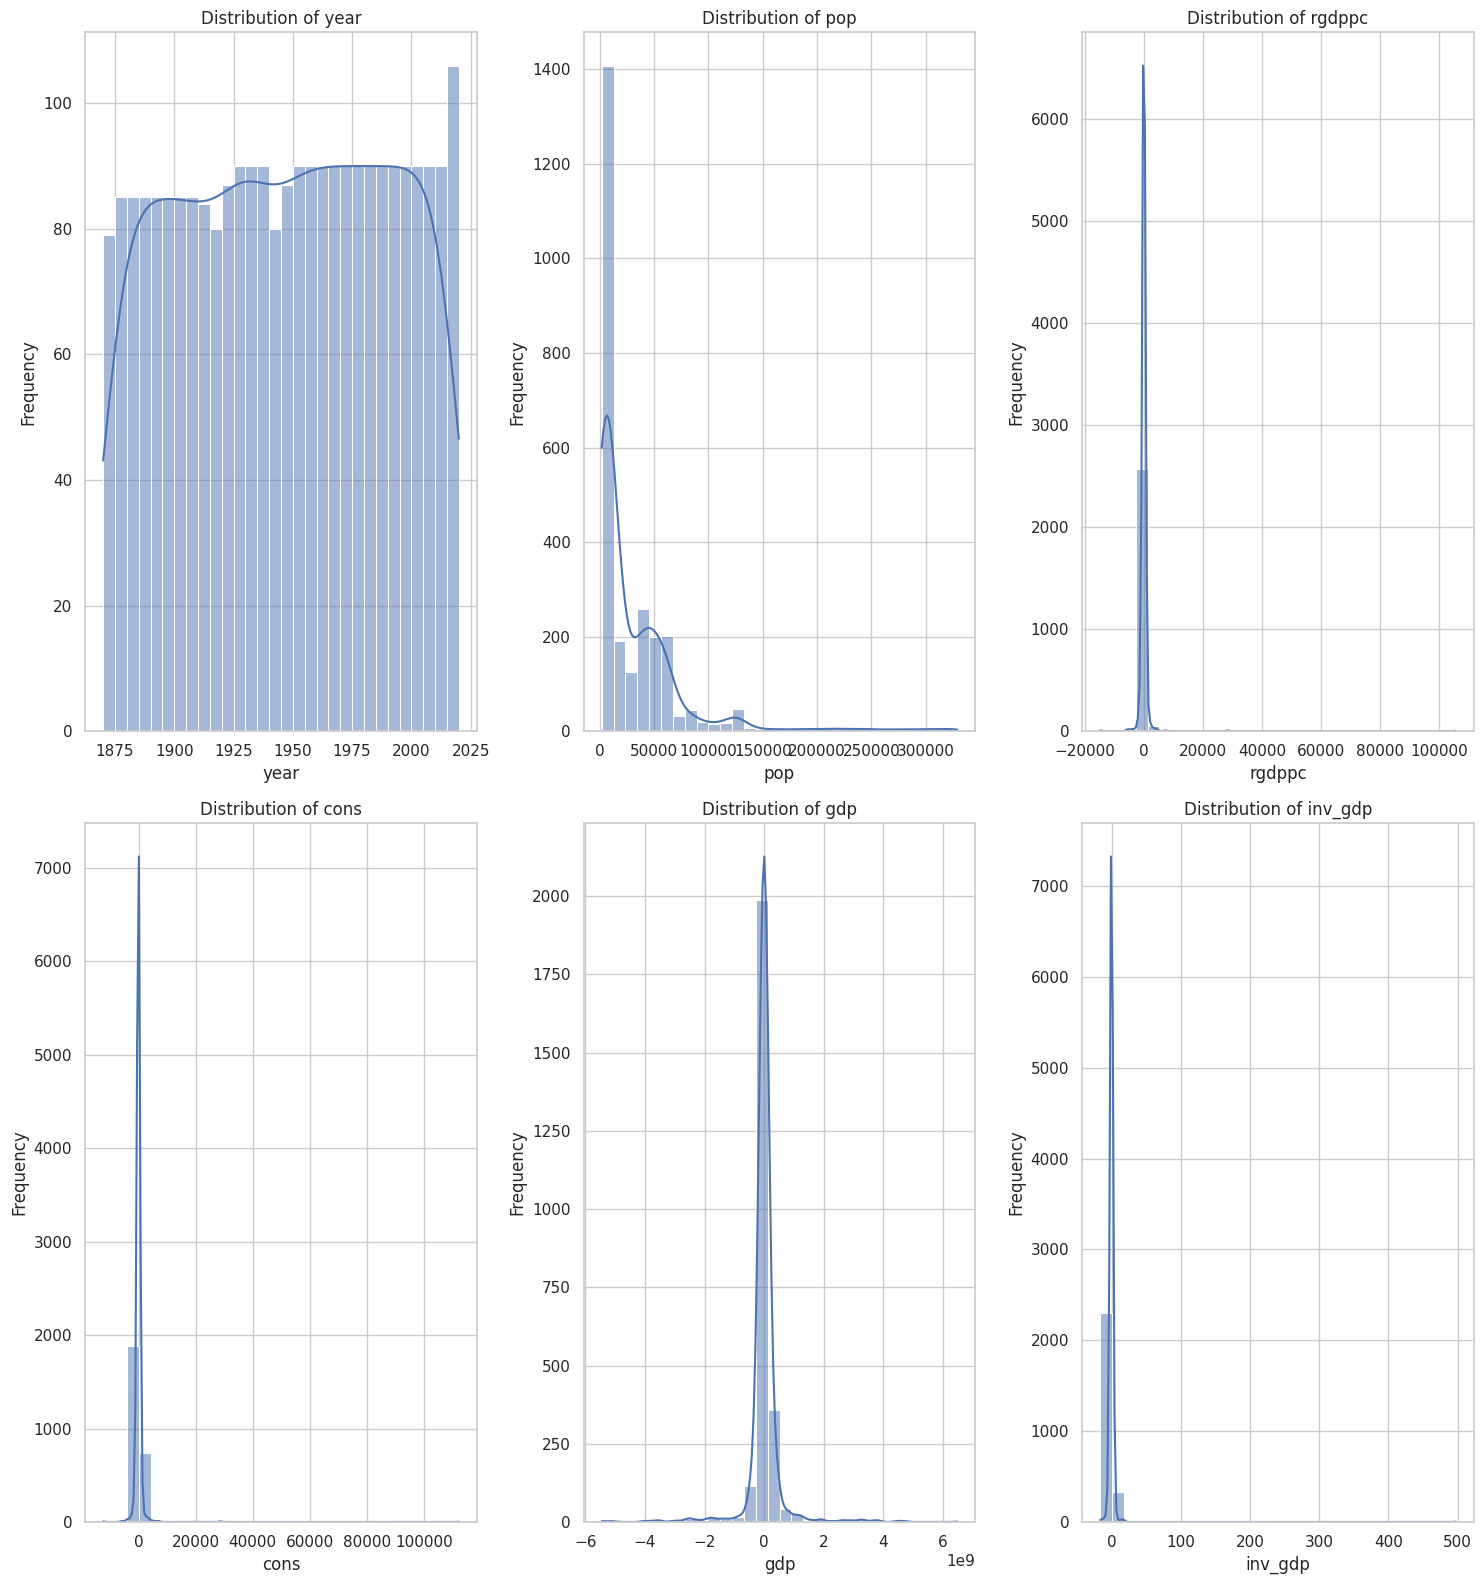

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Define the columns to visualize (exclude 'rgdpmad')
columns_to_visualize = ['year', 'pop', 'rgdppc', 'cons', 'gdp', 'inv_gdp']

# Calculate the number of rows and columns for subplots
num_columns = len(columns_to_visualize)
num_rows = math.ceil(num_columns / 3)

# Create a figure with subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 8 * num_rows))

# Run the basic visualizations for selected columns
for i, column in enumerate(columns_to_visualize):
    row = i // 3  # Determine the row for the subplot
    col = i % 3   # Determine the column for the subplot
    sns.histplot(df[column], bins=30, kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Frequency')

# Remove empty subplots if the number of columns is not a multiple of 3
for i in range(num_columns, num_rows * 3):
    fig.delaxes(axes.flatten()[i])

# Adjust layout
plt.tight_layout()

# Show the subplots
plt.show()


In [41]:
# Exclude specified columns and apply standardization to the remaining features
columns_to_exclude = ['crisis', 'country']
features_to_scale = df_resampled_adasyn.drop(columns_to_exclude, axis=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_to_scale)

# Create a new DataFrame with the scaled features
df_scaled = pd.DataFrame(scaled_features, columns=features_to_scale.columns)

# Add back the excluded columns
for col in columns_to_exclude:
    df_scaled[col] = df_resampled_adasyn[col].values

# Display the first few rows of the standardized DataFrame
df_scaled.head()


year       ifs       pop   rgdpmad    rgdppc      cons       gdp  \
0 -0.255232 -0.080621 -0.591459 -0.480908 -0.500414 -0.311219 -0.239488   
1  1.665457  0.468431  0.113402 -0.034565 -0.037005 -0.020648 -0.276706   
2 -0.302656  0.010888 -0.646954 -0.204189 -0.206081 -0.101239 -0.006876   
3  0.195300  2.161340 -0.553496 -0.197588 -0.128876  0.017715  1.988457   
4  0.029315  0.010888 -0.639418  0.090092  0.113374  0.054820 -0.150237   

    inv_gdp       cpi        ca   imports   exports      nmon      bmon  \
0 -0.102165 -0.669050  0.107679 -0.174982 -0.172474 -0.117374 -0.172253   
1 -0.045213  1.986231  0.107566 -0.175270 -0.172752 -0.117375 -0.172632   
2 -0.316662 -0.389949  0.107881 -0.174829 -0.172414 -0.117154 -0.172170   
3  0.517997 -0.663675  0.107518 -0.175261 -0.172694 -0.117279 -0.172497   
4 -0.088463 -0.416131  0.106885 -0.174950 -0.172534 -0.116515 -0.171894   

      srate     lrate        hp     unemp      wage  pdebt_gdp   revenue  \
0 -0.360275 -0.321879 -0.800117 -0.017455 -0.653779  -1.006769 -0.187660   
1 -1.531796 -0.579672  0.358760  0.693279  1.911760   0.962137 -0.187838   
2 -0.532169 -0.257505 -0.769307 -0.263281 -0.575326  -0.827812 -0.187754   
3 -1.246188 -0.835102 -0.815322 -0.287765 -0.634113   1.125157 -0.187602   
4 -1.166853 -0.519727 -0.773279 -0.254074 -0.576035  -0.421802 -0.187576   

   expenditure     xrusd     tloan      mort     hloan     bloan     bdebt  \
0    -0.188306 -0.202641 -0.145124 -0.174245 -0.255288  0.962988 -0.223897   
1    -0.188420 -0.218831 -0.145317 -0.174382 -0.255396 -0.254581 -0.224020   
2    -0.188389 -0.193962 -0.144852 -0.173978 -0.255040 -0.254355 -0.223809   
3    -0.188244 -0.221381 -0.145343 -0.174427 -0.255446 -0.254541 -0.224006   
4    -0.188030 -0.198585 -0.144783 -0.173683 -0.254760 -0.254453 -0.223921   

        lev       ltd   noncore       peg  peg_strict  peg_type  peg_base  \
0  0.500110  0.629360 -0.581349  0.869887    1.022342  0.983744  0.940048   
1 -0.859803 -0.045896  0.736627 -1.386648   -1.167215 -0.756206  1.953241   
2  0.000369  1.089229  0.353368  0.869887    1.022342  0.983744  0.940048   
3 -0.774480 -1.495734 -0.534260  0.869887    1.022342  0.983744 -0.073145   
4 -0.038951  0.748325  0.093408  0.869887    1.022342  0.983744  1.953241   

   JSTtrilemmaIV     eq_tr  housing_tr   bond_tr  bill_rate  housing_capgain  \
0       0.649418 -0.015593    0.225881 -0.385874  -0.386513        -0.141000   
1      -0.021737 -0.015593    0.207364 -0.039415  -0.228441         0.069986   
2       0.486516 -0.015593   -0.413203 -0.064461  -0.235993        -0.324116   
3       0.041536 -0.015593   -0.556007 -1.293318  -0.273630        -0.351266   
4      -0.004276 -0.015593   -0.932841 -0.575697  -0.840897        -0.742323   

   housing_rent_rtn  housing_rent_yd  eq_capgain     eq_dp  bond_rate  \
0          1.949838         1.891398   -0.015593  0.182400   0.579870   
1          0.059522         0.013387   -0.015593 -0.255063  -0.064166   
2         -0.108915        -0.032523   -0.015593 -0.279656   0.061542   
3         -0.664625        -0.571713   -0.015593 -0.647417   0.461314   
4          0.088751         0.324452   -0.015593 -0.284065  -0.189992   

   eq_div_rtn  capital_tr  risky_tr   safe_tr  Economic_Growth_Rate  \
0    0.937795    0.570807  0.551998 -0.483115             -0.015593   
1    0.037374    0.308617  0.318884 -0.114667             -0.015593   
2    0.009570    0.142067  0.138393 -0.144849             -0.015593   
3   -0.240045    0.226785 -0.075584 -0.184875             -0.015593   
4    0.004587   -0.747696 -0.680039 -0.803406             -0.015593   

   Consumption_to_GDP_Ratio  Investment_Fluctuation  Interest_Rate_Spread  \
0                 -0.163454                0.589782             -0.351693   
1                 -0.163454               -0.404138             -0.137327   
2                 -0.163454                0.188473             -0.284616   
3                 -0.163454                4.245755          

In [42]:
# Import RandomForestClassifier for feature selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Define features and target variable for feature selection
X = df_scaled.drop(columns_to_exclude, axis=1)
y = df_scaled['crisis']

# Initialize a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Fit the model
clf = clf.fit(X, y)

# Get feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# Display the feature importances
feature_importance_df.head(10)


Feature  Importance
48    risky_tr    0.069308
47  capital_tr    0.060812
34    peg_base    0.052269
14       srate    0.041674
31         peg    0.034882
16          hp    0.034199
25       hloan    0.030170
39   bill_rate    0.029875
29         ltd    0.029659
28         lev    0.028912

In [86]:
# Import RFE (Recursive Feature Elimination) from scikit-learn
from sklearn.feature_selection import RFE

# Initialize a RandomForestClassifier for RFE
clf_rfe = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)

# Initialize RFE object with the classifier and number of features to select
# Here we aim to select the top 20 features
rfe = RFE(estimator=clf_rfe, n_features_to_select=40, step=1)

# Fit RFE
rfe_fit = rfe.fit(X, y)

# Get the ranking of features
feature_ranking = rfe_fit.ranking_

# Create a DataFrame to display feature rankings
feature_ranking_df = pd.DataFrame({'Feature': X.columns, 'Ranking': feature_ranking}).sort_values(by='Ranking')

# Display the feature rankings
feature_ranking_df.head(60)


Feature  Ranking
0                       year        1
27                     bloan        1
29                       lev        1
30                       ltd        1
32                       peg        1
33                peg_strict        1
35                  peg_base        1
36             JSTtrilemmaIV        1
37                     eq_tr        1
38                housing_tr        1
40                 bill_rate        1
41           housing_capgain        1
44                eq_capgain        1
45                     eq_dp        1
46                 bond_rate        1
48                capital_tr        1
49                  risky_tr        1
51      Economic_Growth_Rate        1
52  Consumption_to_GDP_Ratio        1
53    Investment_Fluctuation        1
54      Interest_Rate_Spread        1
60               Fourier_gdp        1
26                     hloan        1
25                      mort        1
62         Fourier_bond_rate        1
15                     srate        1
9                        cpi        1
10                        ca        1
11                   imports        1
4                    rgdpmad        1
13                      nmon        1
14                      bmon        1
6                       cons        1
16                     lrate        1
7                        gdp        1
17                        hp        1
18                     unemp        1
2                        ifs        1
22               expenditure        1
3                        pop        1
21                   revenue        2
28                     bdebt        3
59              Fourier_cons        4
23                     xrusd        5
50                   safe_tr        6
12                   exports        7
19                      wage        8
5                     rgdppc        9
31                   noncore       10
47                eq_div_rtn       11
20                 pdebt_gdp       12
55                       FSI       13
39                   bond_tr       14
43           housing_rent_yd       15
58            Fourier_rgdppc       16
56                      MERI       17
61           Fourier_inv_gdp       18
57           Fourier_rgdpmad       19
34                  peg_type       20
42          housing_rent_rtn       21

In [44]:
# Calculate the correlation matrix of the top 20 features including the target variable 'crisis'
top_20_features = feature_ranking_df['Feature'].head(20).tolist() + ['crisis']
correlation_matrix = df_scaled[top_20_features].corr()

# Display the correlation matrix
correlation_matrix


year       peg  peg_base       ltd       lev  \
year                  1.000000  0.027012 -0.064938  0.008014 -0.697799   
peg                   0.027012  1.000000 -0.182269 -0.003075  0.014854   
peg_base             -0.064938 -0.182269  1.000000 -0.192765 -0.114098   
ltd                   0.008014 -0.003075 -0.192765  1.000000  0.267016   
lev                  -0.697799  0.014854 -0.114098  0.267016  1.000000   
hloan                -0.011418  0.129264 -0.127143  0.038448  0.072634   
JSTtrilemmaIV        -0.026438  0.004391  0.013879  0.069387 -0.001709   
xrusd                 0.194061  0.070524 -0.054177  0.012548 -0.159036   
bill_rate             0.092265  0.023372 -0.179797  0.140857 -0.078893   
housing_capgain       0.067920 -0.117959  0.111842 -0.059546 -0.126450   
eq_dp                -0.382660  0.018717 -0.036542  0.102297  0.321707   
peg_strict           -0.129907  0.840047 -0.105050 -0.025852  0.149941   
srate                 0.052861  0.002694 -0.166516  0.167359  0.010284   
hp                   -0.091160 -0.286349 -0.216396  0.340532  0.164228   
ifs                   0.046494 -0.024371  0.139555  0.155604  0.079770   
capital_tr            0.015187 -0.077660  0.137216 -0.054663 -0.086003   
Interest_Rate_Spread  0.152837 -0.112079 -0.082537  0.091522 -0.157066   
risky_tr             -0.006657 -0.081521  0.156454 -0.076982 -0.078758   
ca                   -0.105190 -0.081285  0.105623 -0.045066  0.057610   
bmon                  0.171183  0.107150 -0.149183  0.020694 -0.087098   
crisis               -0.188325 -0.038598 -0.345580  0.220525  0.265320   

                         hloan  JSTtrilemmaIV     xrusd  bill_rate  \
year                 -0.011418      -0.026438  0.194061   0.092265   
peg                   0.129264       0.004391  0.070524   0.023372   
peg_base             -0.127143       0.013879 -0.054177  -0.179797   
ltd                   0.038448       0.069387  0.012548   0.140857   
lev                   0.072634      -0.001709 -0.159036  -0.078893   
hloan                 1.000000      -0.001235  0.013341  -0.073522   
JSTtrilemmaIV        -0.001235       1.000000  0.011685   0.084865   
xrusd                 0.013341       0.011685  1.000000   0.159332   
bill_rate            -0.073522       0.084865  0.159332   1.000000   
housing_capgain       0.005920       0.021149  0.145863   0.119602   
eq_dp                 0.027683      -0.025907 -0.152800   0.197604   
peg_strict            0.162785      -0.039491 -0.055061  -0.236135   
srate                -0.074478       0.087514  0.117484   0.860468   
hp                    0.123611       0.013434 -0.036836   0.009545   
ifs                   0.226755       0.042875 -0.016193   0.091300   
capital_tr           -0.024304       0.007973  0.108346   0.194325   
Interest_Rate_Spread -0.062291       0.063973  0.185229   0.819807   
risky_tr             -0.022436       0.014007  0.095503   0.139004   
ca                   -0.600940       0.004615 -0.040963   0.017849   
bmon                  0.738692      -0.029129  0.064487  -0.071772   
crisis                0.037191       0.035322 -0.068203   0.166939   

                      housing_capgain     eq_dp  peg_strict     srate  \
year                         0.067920 -0.382660   -0.129907  0.052861   
peg                         -0.117959  0.018717    0.840047  0.002694   
peg_base                     0.111842 -0.036542   -0.105050 -0.166516   
ltd                         -0.059546  0.102297   -0.025852  0.167359   
lev                         -0.126450  0.321707    0.149941  0.010284   
hloan                        0.005920  0.027683    0.162785 -0.074478   
JSTtrilemmaIV                0.021149 -0.025907   -0.039491  0.087514   
xrusd                        0.145863 -0.152800   -0.055061  0.117484   
bill_rate                    0.119602  0.197604   -0.236135  0.860468   
housing_capgain              1.000000 -0.118630   -0.160821  0.104380   
eq_dp                       -0.118630  1.000000    0.

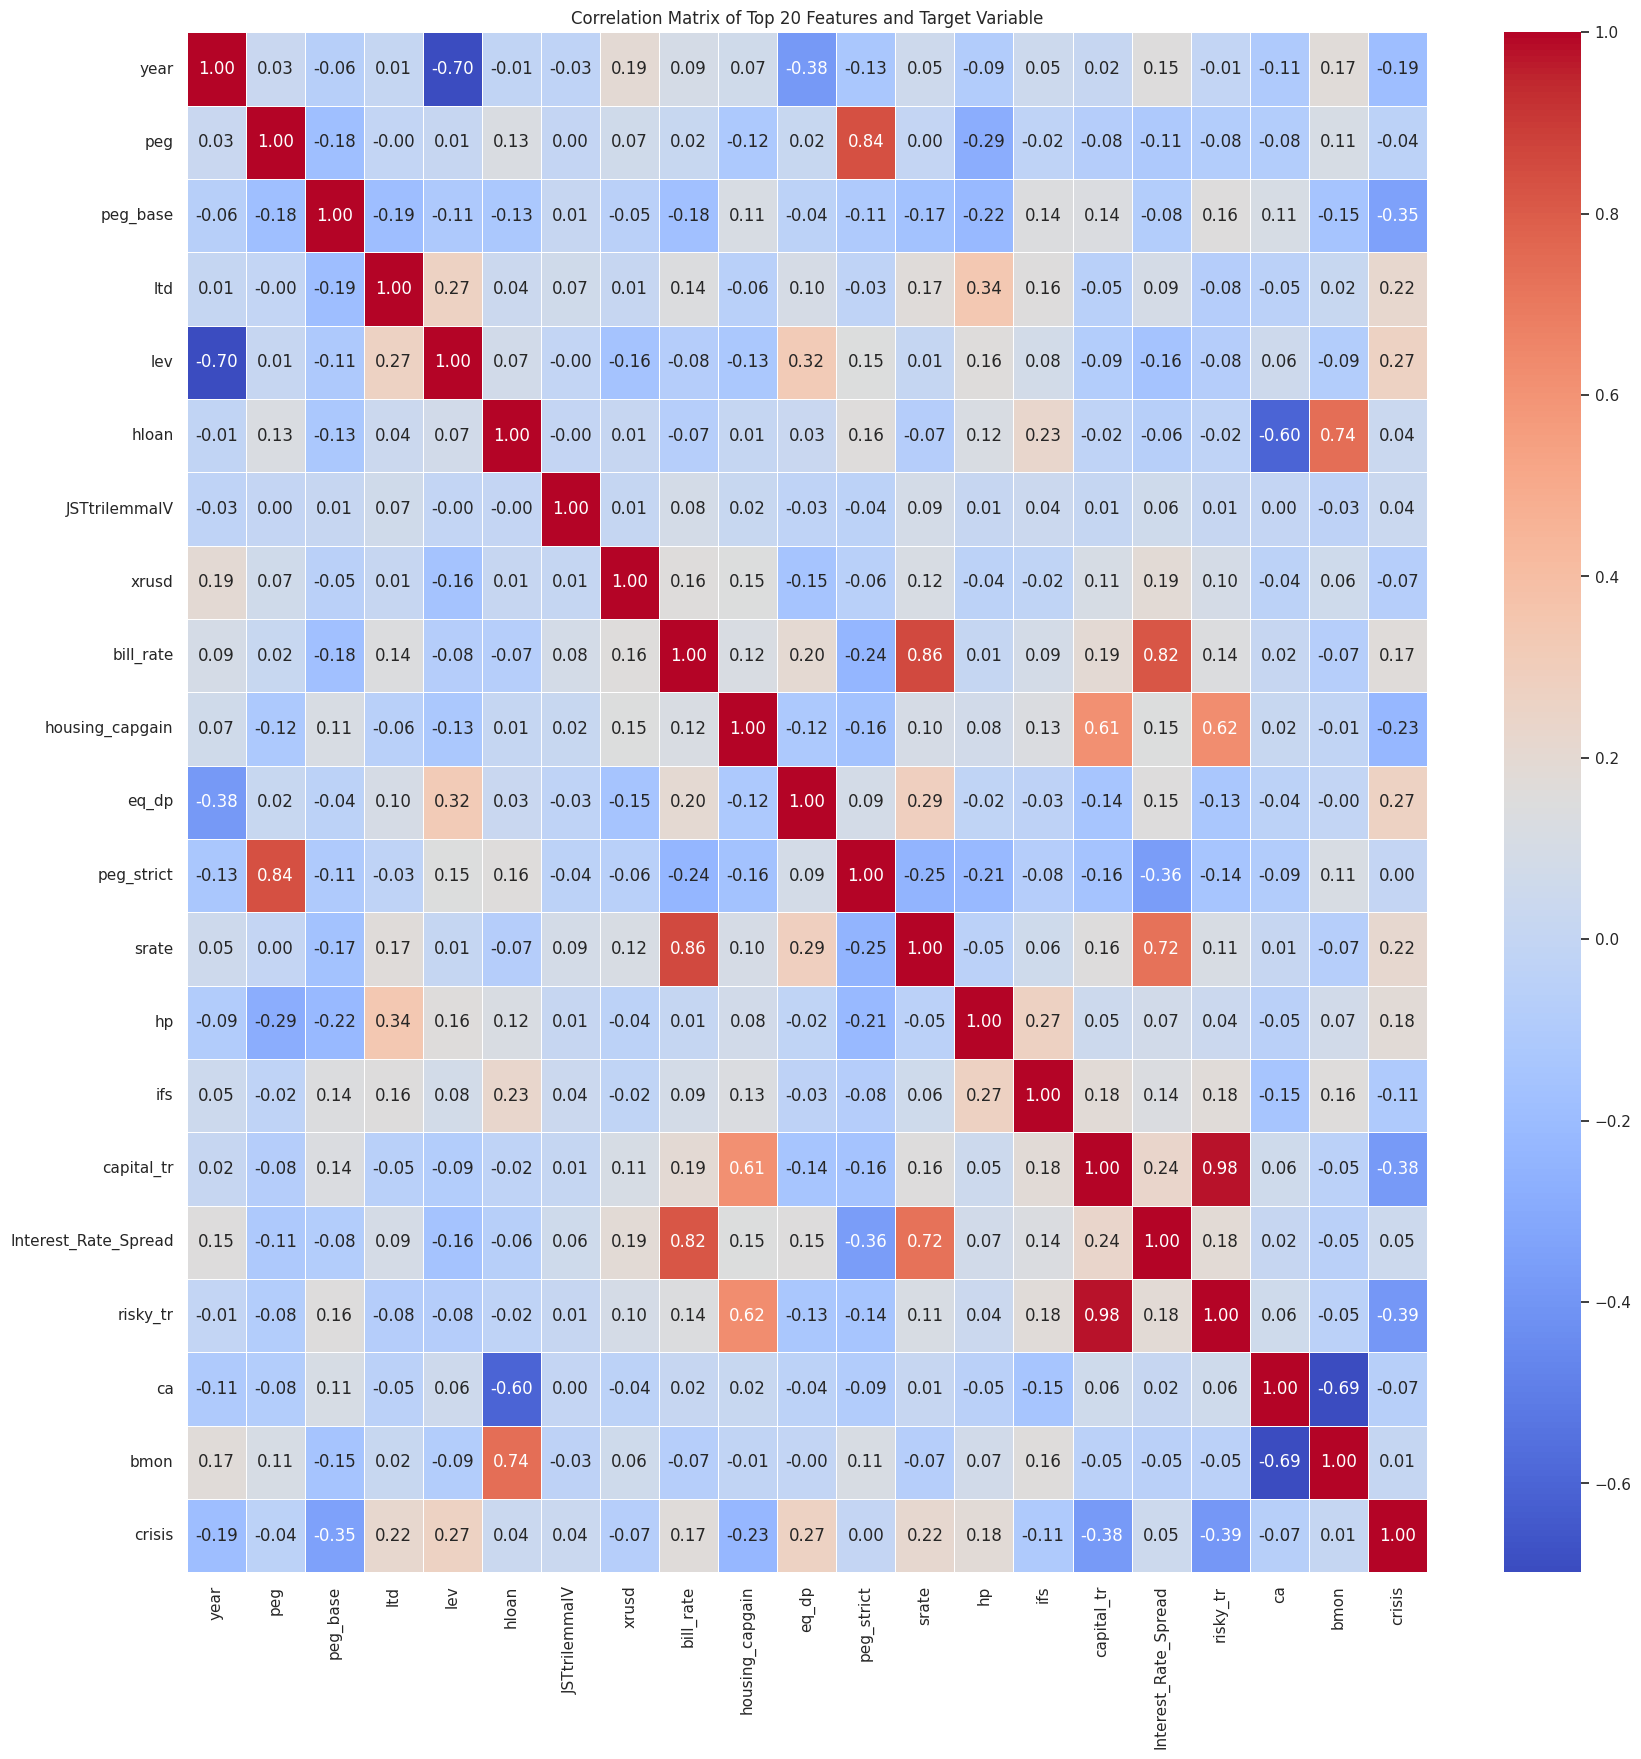

In [45]:
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Top 20 Features and Target Variable')
plt.show()

In [46]:
# Display the features with the highest ranking (least importance) in RFE
least_important_features_rfe = feature_ranking_df.sort_values(by='Ranking', ascending=False).head(10)
least_important_features_rfe


Feature  Ranking
36                     eq_tr       43
43                eq_capgain       42
50      Economic_Growth_Rate       41
51  Consumption_to_GDP_Ratio       40
55                      MERI       39
41          housing_rent_rtn       38
21               expenditure       37
10                   imports       36
23                     tloan       35
4                     rgdppc       34

In [47]:
df_scaled

year       ifs       pop   rgdpmad    rgdppc      cons       gdp  \
0    -0.255232 -0.080621 -0.591459 -0.480908 -0.500414 -0.311219 -0.239488   
1     1.665457  0.468431  0.113402 -0.034565 -0.037005 -0.020648 -0.276706   
2    -0.302656  0.010888 -0.646954 -0.204189 -0.206081 -0.101239 -0.006876   
3     0.195300  2.161340 -0.553496 -0.197588 -0.128876  0.017715  1.988457   
4     0.029315  0.010888 -0.639418  0.090092  0.113374  0.054820 -0.150237   
...        ...       ...       ...       ...       ...       ...       ...   
4109  0.550983 -0.904198  0.051166 -0.096146 -0.072202 -0.025107 -0.133797   
4110  1.570608 -0.263638 -0.345725 -0.002380  0.022005  0.013308 -0.147814   
4111  0.716968 -1.087215  0.222355 -0.103984 -0.086851 -0.031543 -0.131164   
4112  1.570608 -0.721181  1.267943 -0.013014 -0.001229  0.026699 -0.140463   
4113  1.191213 -1.270232  0.182547 -0.075196 -0.072627 -0.040823 -0.128931   

       inv_gdp       cpi        ca   imports   exports      nmon      bmon  \
0    -0.102165 -0.669050  0.107679 -0.174982 -0.172474 -0.117374 -0.172253   
1    -0.045213  1.986231  0.107566 -0.175270 -0.172752 -0.117375 -0.172632   
2    -0.316662 -0.389949  0.107881 -0.174829 -0.172414 -0.117154 -0.172170   
3     0.517997 -0.663675  0.107518 -0.175261 -0.172694 -0.117279 -0.172497   
4    -0.088463 -0.416131  0.106885 -0.174950 -0.172534 -0.116515 -0.171894   
...        ...       ...       ...       ...       ...       ...       ...   
4109 -0.031148  0.318403  0.107548 -0.175248 -0.172772 -0.117410 -0.172574   
4110  0.003563  1.643132  0.115734 -0.139570 -0.131214 -0.087471 -0.137724   
4111 -0.034436  0.555090  0.107561 -0.175268 -0.172782 -0.117415 -0.172597   
4112 -0.091173  1.878896  0.107860 -0.175054 -0.172453 -0.117242 -0.172470   
4113 -0.006056  1.114446  0.107594 -0.175321 -0.172806 -0.117421 -0.172671   

         srate     lrate        hp     unemp      wage  pdebt_gdp   revenue  \
0    -0.360275 -0.321879 -0.800117 -0.017455 -0.653779  -1.006769 -0.187660   
1    -1.531796 -0.579672  0.358760  0.693279  1.911760   0.962137 -0.187838   
2    -0.532169 -0.257505 -0.769307 -0.263281 -0.575326  -0.827812 -0.187754   
3    -1.246188 -0.835102 -0.815322 -0.287765 -0.634113   1.125157 -0.187602   
4    -1.166853 -0.519727 -0.773279 -0.254074 -0.576035  -0.421802 -0.187576   
...        ...       ...       ...       ...       ...        ...       ...   
4109  0.872307  0.728780 -0.534960  0.874267  0.180658  -0.543033 -0.187822   
4110 -1.084747 -0.525390 -0.235156 -0.055066  1.522954  -0.295036 -0.166706   
4111  1.103790  0.943642 -0.472705  0.838103  0.376451  -0.583824 -0.187826   
4112 -0.119624 -0.248256 -0.214888  0.571563  1.516509   0.263426 -0.187729   
4113  1.698902  1.767977 -0.267933  0.550367  0.829726  -0.307870 -0.187832   

      expenditure     xrusd     tloan      mort     hloan     bloan     bdebt  \
0       -0.188306 -0.202641 -0.145124 -0.174245 -0.255288  0.962988 -0.223897   
1       -0.188420 -0.218831 -0.145317 -0.174382 -0.255396 -0.254581 -0.224020   
2       -0.188389 -0.193962 -0.144852 -0.173978 -0.255040 -0.254355 -0.223809   
3       -0.188244 -0.221381 -0.145343 -0.174427 -0.255446 -0.254541 -0.224006   
4       -0.188030 -0.198585 -0.144783 -0.173683 -0.254760 -0.254453 -0.223921   
...           ...       ...       ...       ...       ...       ...       ...   
4109    -0.188412 -0.207666 -0.145284 -0.174377 -0.245755 -0.246538 -0.224025   
4110    -0.175393 -0.219243 -0.112762 -0.128979 -0.215721 -0.247296 -0.212321   
4111    -0.188417 -0.211257 -0.145301 -0.174385 -0.248195 -0.248567 -0.224036   
4112    -0.188349 -0.217406 -0.145187 -0.174276 -0.255333 -0.254497 -0.223983   
4113    -0.188425 -0.208293 -0.145344 -0.174401 -0.255435 -0.254583 -0.224069   

           lev       ltd   noncore       peg  peg_strict  peg_type  peg_base  \
0     0.500110  0.629360 -0.581349  0.869887    1.022342  0.983744  0.940048   
1    -0.859803 -0.045896  0.736627 -1.386648   -1.1672

In [48]:
df_scaled.to_csv('df_scaled.csv')

Not comfortable in removing any variables as from domain perspective it might be important

PCA will make the variables not-interpretable for us it wont be suitable, we might try in later stage

### **Model Implementation**

In [49]:
# Importing libraries for model building and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score, matthews_corrcoef

# Splitting the data into features (X) and target variable (y)
X = df_resampled_adasyn.drop('crisis', axis=1)
y = df_resampled_adasyn['crisis']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initializing the models
logistic_model = LogisticRegression(random_state=42, max_iter = 1000)
random_forest_model = RandomForestClassifier(random_state=42)
gradient_boosting_model = GradientBoostingClassifier(random_state=42)
xgboost_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='auc')


Lets try Neural Networks

In [50]:

# Assume 'X' contains your feature columns and 'y' is your target variable
import keras
from tensorflow.keras.metrics import AUC
from kerastuner.tuners import RandomSearch
from kerastuner import Objective
from tensorflow.keras.regularizers import l1
from tensorflow.keras.layers import Input, LSTM, SimpleRNN, Attention, Dense, Dropout


# Reshape the data for LSTM/RNN
X_train_reshaped = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# LSTM Model with Attention
input_layer = keras.layers.Input(shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]))

lstm_layer = keras.layers.LSTM(128, return_sequences=True, activity_regularizer=l1(0.001))(input_layer) 
dropout1 = Dropout(0.5)(lstm_layer)
attention = keras.layers.Attention()([dropout1, dropout1])
norm1 = keras.layers.BatchNormalization()(attention)
lstm_layer2 = keras.layers.LSTM(64, return_sequences=False)(norm1)
output_layer = keras.layers.Dense(1, activation='sigmoid')(lstm_layer2)

lstm_model = keras.models.Model(inputs=input_layer, outputs=output_layer)
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[AUC( curve='ROC')])

lstm_model.summary()

# Train the LSTM model
lstm_model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_split=0.1)
lstm_model.save('lstm_model.h5')

# RNN Model with Attention
input_layer_rnn = keras.layers.Input(shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]))
rnn_layer = keras.layers.SimpleRNN(64, return_sequences=False)(input_layer_rnn)
attention_rnn = keras.layers.Attention()([rnn_layer, rnn_layer])
output_layer_rnn = keras.layers.Dense(1, activation='sigmoid')(attention_rnn)

rnn_model = keras.models.Model(inputs=input_layer_rnn, outputs=output_layer_rnn)
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[AUC( curve='ROC')])

rnn_model.summary()

# Train the RNN model
rnn_model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_split=0.1)
rnn_model.save('rnn_model.h5')


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 63, 1)]      0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 63, 128)      66560       ['input_1[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 63, 128)      0           ['lstm[0][0]']                   
                                                                                                  
 attention (Attention)          (None, 63, 128)      0           ['dropout[0][0]',                
                                                                  'dropout[0][0]']            

In [92]:
# RNN Model without attention
input_layer_rnn = keras.layers.Input(shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]))
rnn_layer = keras.layers.SimpleRNN(128, return_sequences=True)(input_layer_rnn)
norm1 = keras.layers.BatchNormalization()(rnn_layer)
rnn_layer2 = keras.layers.SimpleRNN(64, return_sequences=False)(norm1)
output_layer_rnn = keras.layers.Dense(1, activation='sigmoid')(rnn_layer2)

rnn_model_2 = keras.models.Model(inputs=input_layer_rnn, outputs=output_layer_rnn)
rnn_model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=[AUC( curve='ROC')])

rnn_model_2.summary()

# Train the RNN model
rnn_model_2.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_split=0.1)

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 63, 1)]           0         
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 63, 128)           16640     
                                                                 
 batch_normalization_2 (Batc  (None, 63, 128)          512       
 hNormalization)                                                 
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 64)                12352     
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 29,569
Trainable params: 29,313
Non-trainable params: 256
_____________________________________________________

In [93]:
y_pred = rnn_model_2.predict(X_test_reshaped)
roc_auc_score(y_test, y_pred)

26/26 [==============================] - 1s 14ms/step


0.9850815024805102

In [51]:
# Assuming lstm_model and rnn_model are your trained LSTM and RNN models
# lstm_model = load_model('lstm_model.h5')
# rnn_model = load_model('rnn_model.h5')

# Define a dictionary to hold new models
# Dictionary to store the models and their results
model_dict = {
    'Logistic Regression': logistic_model,
    'Random Forest': random_forest_model,
    'Gradient Boosting': gradient_boosting_model,
    'XGBoost': xgboost_model,
    'LSTM': lstm_model,
    'RNN': rnn_model
}

# Dictionary to store evaluation metrics
evaluation_metrics = {
    'Model': [],
    'Accuracy': [],
    'precision':[],
    'recall':[],
    'F1 Score': [],
    'roc_auc_score' : [],
    'mcc':[]
}


# Iterate through new models and add their performance metrics to the existing DataFrame
for model_name, model in model_dict.items():
    if model_name in ["LSTM","RNN"]:
        # Reshape the test data for LSTM or RNN
        y_pred = model.predict(X_test_reshaped)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    # Evaluating the model
    acc = accuracy_score(y_test, y_pred.round())
    f1 = f1_score(y_test, y_pred.round())
    auc_score = roc_auc_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred.round())
    recall = recall_score(y_test, y_pred.round())
    mcc = matthews_corrcoef(y_test, y_pred.round())
    
    # Storing the results
    evaluation_metrics['Model'].append(model_name)
    evaluation_metrics['Accuracy'].append(acc)
    evaluation_metrics['precision'].append(precision)
    evaluation_metrics['recall'].append(recall)
    evaluation_metrics['F1 Score'].append(f1)
    evaluation_metrics['roc_auc_score'].append(auc_score)
    evaluation_metrics['mcc'].append(mcc)
    
evaluation_metrics_df = pd.DataFrame(evaluation_metrics)

evaluation_metrics_df

26/26 [==============================] - 0s 6ms/step


Model  Accuracy  precision    recall  F1 Score  \
0  Logistic Regression  0.859052   0.845266  0.881928  0.863208   
1        Random Forest  0.984204   0.987864  0.980723  0.984281   
2    Gradient Boosting  0.970838   0.973366  0.968675  0.971014   
3              XGBoost  0.986634   0.985577  0.987952  0.986763   
4                 LSTM  0.725395   0.727711  0.727711  0.727711   
5                  RNN  0.902795   0.881549  0.932530  0.906323   

   roc_auc_score       mcc  
0       0.858856  0.718668  
1       0.984234  0.968434  
2       0.970857  0.941686  
3       0.986623  0.973269  
4       0.830522  0.450750  
5       0.967517  0.806854

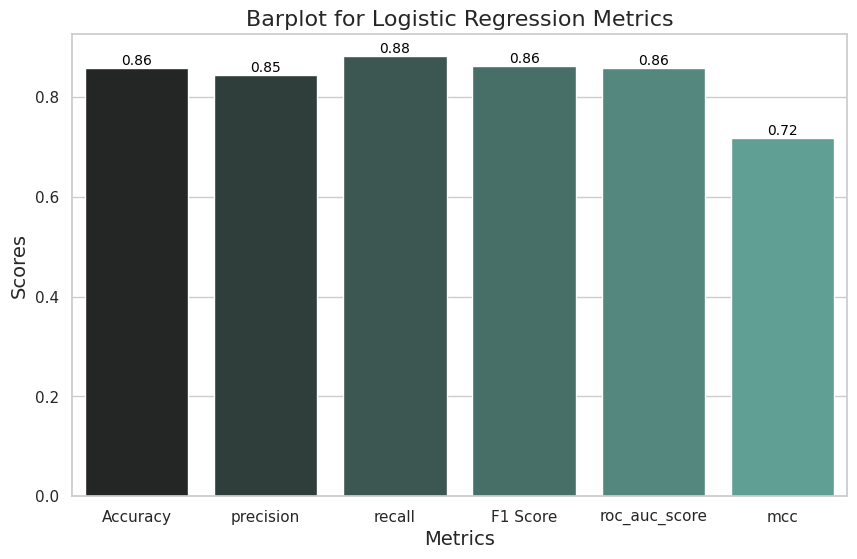

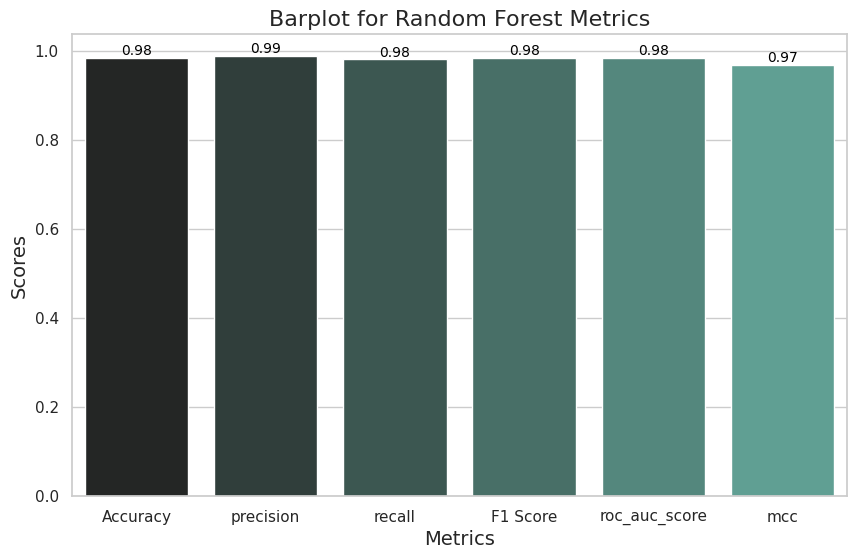

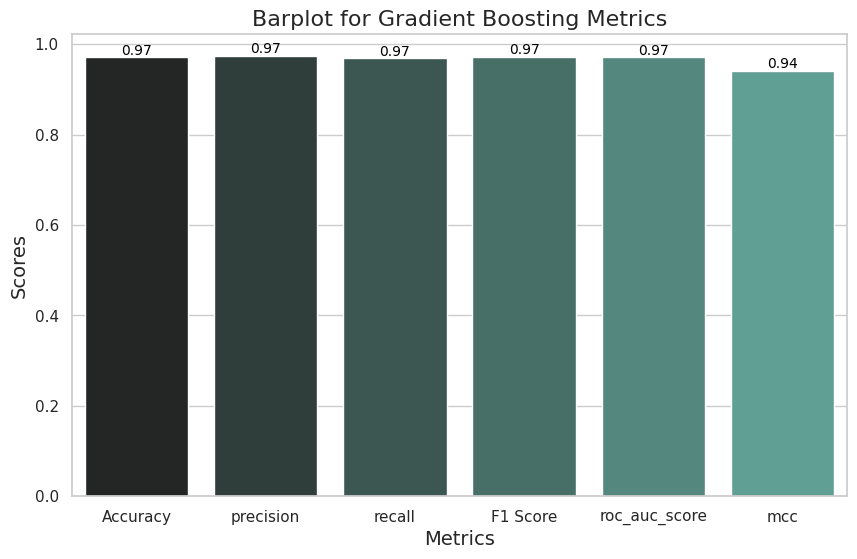

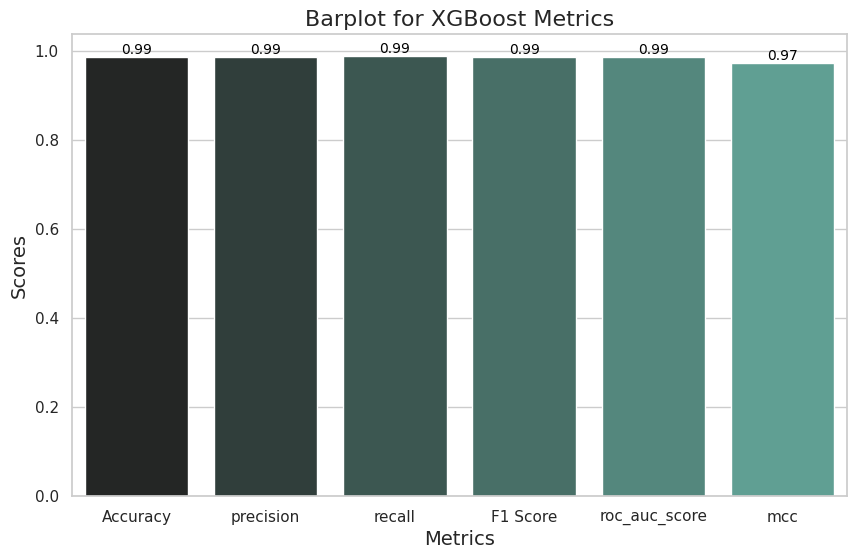

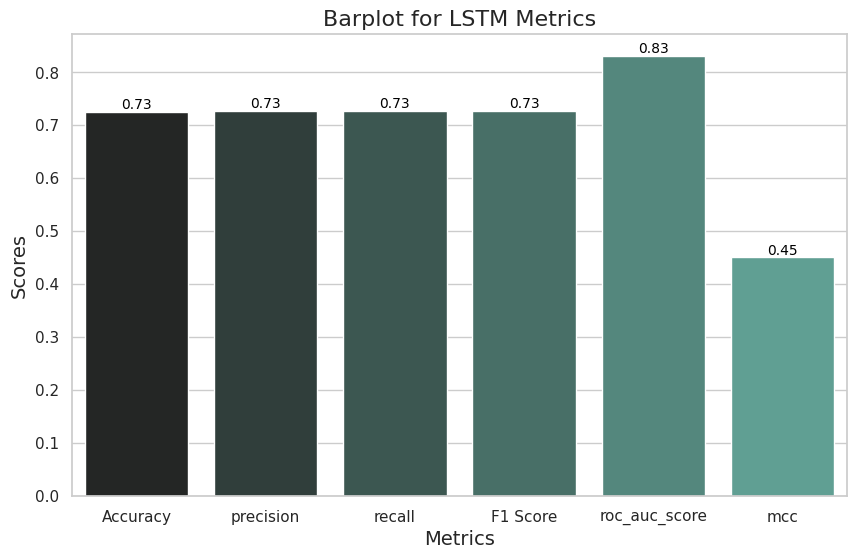

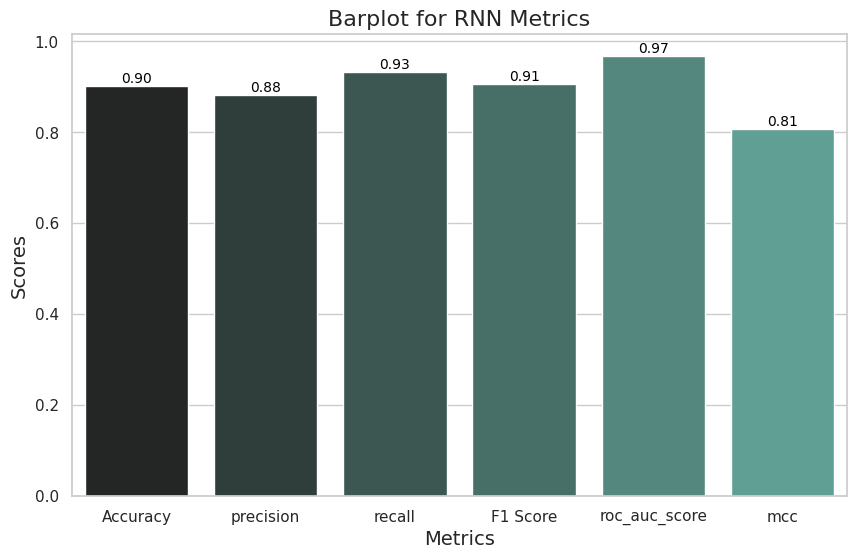

In [52]:
# Creating separate bar plots for each model with annotations and darker color palette
model_list = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'LSTM', 'RNN']
for model in model_list:
    plt.figure(figsize=(10, 6))
    model_data = evaluation_metrics_df[evaluation_metrics_df['Model'] == model]
    model_data_melted = model_data.melt(id_vars=['Model'], value_vars=['Accuracy', 'precision', 'recall', 'F1 Score', 'roc_auc_score', 'mcc'])
    
    # Create the barplot
    ax = sns.barplot(x='variable', y='value', data=model_data_melted, palette='dark:#5A9')
    
    # Adding annotations to bars
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.2f}", 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                    textcoords='offset points')
    
    # Adding titles and labels
    plt.title(f'Barplot for {model} Metrics', fontsize=16)
    plt.xlabel('Metrics', fontsize=14)
    plt.ylabel('Scores', fontsize=14)
    
    # Show the plot
    plt.show()


## **Hyper Parameter Tuning**

In [53]:
from sklearn.model_selection import StratifiedKFold,RandomizedSearchCV, GridSearchCV

In [54]:
# Existing code for initializing traditional ML models
model_dict = {
    'Logistic Regression': {'model': LogisticRegression(random_state=42,max_iter = 2000), 
                            'params': {'C': np.logspace(-4, 4, 20), 'solver': ['newton-cg', 'lbfgs', 'liblinear']}},
    'Random Forest': {'model': RandomForestClassifier(random_state=42), 
                      'params': {'n_estimators': [100,200], 'max_depth': [10, 15, 20, 30], 'min_samples_split': [3, 5, 10]}},
    'Gradient Boosting': {'model': GradientBoostingClassifier(random_state=42), 
                          'params': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 4, 5]}},
    'XGBoost': {'model': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='auc'), 
                'params': {'n_estimators': [100, 150], 'learning_rate': [0.2, 0.3, 0.4], 'max_depth': [6, 7], 'min_child_weight': [1, 3]}},
}

best_estimators_gs = {}


# Loop for hyperparameter tuning
for model_name, info in model_dict.items():

    print(f"\n\nRunning GridSearchCV for {model_name}.")

    # If model is LSTM or RNN, use X_train_reshaped, else use X_train
    X_train_for_model = X_train_reshaped if model_name in ['LSTM', 'RNN'] else X_train

    grid = GridSearchCV(estimator=info['model'], param_grid=info['params'], cv=3, verbose=10, n_jobs=-1, scoring='roc_auc')
    grid_result = grid.fit(X_train_for_model, y_train)

    # Summarize and save the results
    print(f"\nBest Score for {model_name}: {grid_result.best_score_} using {grid_result.best_params_}\n\n")
    best_estimators_gs[model_name] = grid_result.best_estimator_




Running GridSearchCV for Logistic Regression.
Fitting 3 folds for each of 60 candidates, totalling 180 fits

Best Score for Logistic Regression: 0.9364274863968332 using {'C': 78.47599703514607, 'solver': 'lbfgs'}




Running GridSearchCV for Random Forest.
Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3; 2/60] START C=0.0001, solver=lbfgs.....................................
[CV 1/3; 2/60] END ......C=0.0001, solver=lbfgs;, score=0.861 total time=   0.1s
[CV 1/3; 4/60] START C=0.00026366508987303583, solver=newton-cg.................
[CV 1/3; 4/60] END C=0.00026366508987303583, solver=newton-cg;, score=0.869 total time=   0.1s
[CV 3/3; 5/60] START C=0.00026366508987303583, solver=lbfgs.....................
[CV 3/3; 5/60] END C=0.00026366508987303583, solver=lbfgs;, score=0.873 total time=   0.0s
[CV 1/3; 7/60] START C=0.0006951927961775605, solver=newton-cg..................
[CV 1/3; 7/60] END C=0.0006951927961775605, solver=newton-cg;, score=0.879 total time=  

In [55]:
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.metrics import make_scorer, matthews_corrcoef

def build_lstm(units=64, activation='relu', dropout=0.5, learning_rate=0.001, optimizer='Adam'):
    opt = Adam(learning_rate=learning_rate) if optimizer == 'Adam' else SGD(learning_rate=learning_rate)
    input_layer = keras.layers.Input(shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]))
    lstm_layer = keras.layers.LSTM(units, return_sequences=True)(input_layer)
    #dropout1 = Dropout(dropout)(lstm_layer)
    attention = keras.layers.Attention()([lstm_layer, lstm_layer])
    lstm_layer2 = keras.layers.LSTM(64, return_sequences=False)(attention)
    output_layer = keras.layers.Dense(1, activation='sigmoid')(lstm_layer2)
    lstm_model = keras.models.Model(inputs=input_layer, outputs=output_layer)
    lstm_model.compile(optimizer=opt, loss='binary_crossentropy', metrics=[AUC(curve='ROC')])
    return lstm_model

def build_rnn(units=64, activation='relu', dropout=0.5, learning_rate=0.001, optimizer='Adam'):
    opt = Adam(learning_rate=learning_rate) if optimizer == 'Adam' else SGD(learning_rate=learning_rate)
    input_layer = keras.layers.Input(shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]))
    rnn_layer = keras.layers.SimpleRNN(units, return_sequences=False)(input_layer)
    attention_rnn = keras.layers.Attention()([rnn_layer, rnn_layer])
    output_layer = keras.layers.Dense(1, activation='sigmoid')(attention_rnn)
    rnn_model = keras.models.Model(inputs=input_layer, outputs=output_layer)
    rnn_model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=[AUC(curve='ROC')])
    return rnn_model



[CV 1/3; 21/24] END learning_rate=0.4, max_depth=7, min_child_weight=1, n_estimators=100;, score=0.997 total time=   2.5s
[CV 2/3; 22/24] START learning_rate=0.4, max_depth=7, min_child_weight=1, n_estimators=150
[CV 2/3; 22/24] END learning_rate=0.4, max_depth=7, min_child_weight=1, n_estimators=150;, score=0.997 total time=   3.1s
[CV 3/3; 23/24] START learning_rate=0.4, max_depth=7, min_child_weight=3, n_estimators=100
[CV 3/3; 23/24] END learning_rate=0.4, max_depth=7, min_child_weight=3, n_estimators=100;, score=0.999 total time=   2.1s
[CV 3/3; 21/24] END learning_rate=0.4, max_depth=7, min_child_weight=1, n_estimators=100;, score=0.999 total time=   2.6s
[CV 1/3; 23/24] START learning_rate=0.4, max_depth=7, min_child_weight=3, n_estimators=100
[CV 1/3; 23/24] END learning_rate=0.4, max_depth=7, min_child_weight=3, n_estimators=100;, score=0.997 total time=   2.2s
[CV 1/3; 24/24] START learning_rate=0.4, max_depth=7, min_child_weight=3, n_estimators=150
[CV 1/3; 24/24] END learni

In [200]:
from kerastuner.tuners import RandomSearch, GridSearch
from kerastuner import Objective

from tensorflow.keras.optimizers import Adam, SGD
from kerastuner import RandomSearch, Objective

def build_lstm_model(hp):
    units = hp.Int('units', min_value=32, max_value=128, step=16)
    #dropout = hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')
    optimizer = hp.Choice('optimizer', values=['Adam', 'SGD'])
    
    return build_lstm(units=units, learning_rate=learning_rate, optimizer=optimizer)

def build_rnn_model(hp):
    units = hp.Int('units', min_value=32, max_value=128, step=16)
    
    return build_rnn(units=units)

# Initialize RandomSearch tuner for LSTM
tuner_lstm = RandomSearch(
    build_lstm_model,
    objective=Objective("val_auc", direction="max"),
    max_trials=20,
    executions_per_trial=2,
    project_name='lstm_final'
)

# Conduct hyperparameter search for LSTM
tuner_lstm.search(X_train_reshaped, y_train, epochs=10, validation_split=0.1)

# Initialize RandomSearch tuner for RNN
tuner_rnn = GridSearch(
    build_rnn_model,
    objective=Objective("val_auc", direction="max"),
    executions_per_trial=2,
    project_name='rnnfinal'
)

# Conduct hyperparameter search for RNN
tuner_rnn.search(X_train_reshaped, y_train, epochs=10, validation_split=0.1)


Trial 7 Complete [00h 00m 43s]
val_auc: 0.9887602925300598

Best val_auc So Far: 0.9887602925300598
Total elapsed time: 00h 04m 57s


In [61]:
# from tensorflow.keras.models import load_model
# best_lstm_model = load_model("/kaggle/input/models/lst_model_final.h5")
# best_rnn_model = load_model("/kaggle/input/models/rnn_model_final.h5")

In [62]:
# Retrieve the best LSTM model
best_lstm_model = tuner_lstm.get_best_models(num_models=1)[0]

# Evaluate the best LSTM model on the test data
lstm_test_loss, lstm_test_auc = best_lstm_model.evaluate(X_test_reshaped, y_test)
print(f"Test AUC for the best LSTM model: {lstm_test_auc}")

# Retrieve the best RNN model
best_rnn_model = tuner_rnn.get_best_models(num_models=1)[0]

nn_models = [best_lstm_model,best_rnn_model]

# Evaluate the best RNN model on the test data
rnn_test_loss, rnn_test_auc = best_rnn_model.evaluate(X_test_reshaped, y_test)
print(f"Test AUC for the best RNN model: {rnn_test_auc}")


26/26 [==============================] - 2s 40ms/step - loss: 0.4106 - auc: 0.8908
Test AUC for the best LSTM model: 0.8908486366271973
26/26 [==============================] - 1s 8ms/step - loss: 0.1402 - auc: 0.9871
Test AUC for the best RNN model: 0.9871219992637634


In [63]:
# Assuming lstm_model and rnn_model are your trained LSTM and RNN models
# lstm_model = load_model('lstm_model.h5')
# rnn_model = load_model('rnn_model.h5')

# Define a dictionary to hold new models
# Dictionary to store the models and their results
model_list = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'LSTM', 'RNN']

# Dictionary to store evaluation metrics
evaluation_metrics = {
    'Model': [],
    'Accuracy': [],
    'precision':[],
    'recall':[],
    'F1 Score': [],
    'roc_auc_score' : [],
    'mcc':[]
}

classification_reports = {
    'Model': [],
    'Classification Report': []
}

# Iterate through new models and add their performance metrics to the existing DataFrame
for model_name in model_list:
    if model_name in ["LSTM","RNN"]:
        # Reshape the test data for LSTM or RNN
        model = nn_models[0] if model_name == "LSTM" else nn_models[1]
        y_pred = model.predict(X_test_reshaped)
    else:
        model = best_estimators_gs[model_name]
        y_pred = model.predict(X_test)
    
    # Evaluating the model
    acc = accuracy_score(y_test, y_pred.round())
    f1 = f1_score(y_test, y_pred.round())
    auc_score = roc_auc_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred.round())
    recall = recall_score(y_test, y_pred.round())
    mcc = matthews_corrcoef(y_test, y_pred.round())
    
    # Storing the results
    evaluation_metrics['Model'].append(model_name)
    evaluation_metrics['Accuracy'].append(acc)
    evaluation_metrics['precision'].append(precision)
    evaluation_metrics['recall'].append(recall)
    evaluation_metrics['F1 Score'].append(f1)
    evaluation_metrics['roc_auc_score'].append(auc_score)
    evaluation_metrics['mcc'].append(mcc)
    
    # Generate the classification report
    print("\n")
    print(model_name)
    report = classification_report(y_test, y_pred.round(), target_names=['Crisis', 'No Crisis'], output_dict=True, digits=6)
    print(classification_report(y_test, y_pred.round(), target_names=['Crisis', 'No Crisis'], digits=6))
    # Storing the results
    classification_reports['Model'].append(model_name)
    classification_reports['Classification Report'].append(report)
    print("=" * 80)

# Convert the classification reports to a DataFrame
classification_reports_df = pd.DataFrame(classification_reports)

evaluation_metrics_df_ht = pd.DataFrame(evaluation_metrics)



evaluation_metrics_df_ht



Logistic Regression
              precision    recall  f1-score   support

      Crisis   0.884021  0.840686  0.861809       408
   No Crisis   0.850575  0.891566  0.870588       415

    accuracy                       0.866343       823
   macro avg   0.867298  0.866126  0.866199       823
weighted avg   0.867155  0.866343  0.866236       823



Random Forest
              precision    recall  f1-score   support

      Crisis   0.982885  0.985294  0.984088       408
   No Crisis   0.985507  0.983133  0.984318       415

    accuracy                       0.984204       823
   macro avg   0.984196  0.984213  0.984203       823
weighted avg   0.984207  0.984204  0.984204       823



Gradient Boosting
              precision    recall  f1-score   support

      Crisis   0.980488  0.985294  0.982885       408
   No Crisis   0.985472  0.980723  0.983092       415

    accuracy                       0.982989       823
   macro avg   0.982980  0.983009  0.982988       823
weighted avg   0

Model  Accuracy  precision    recall  F1 Score  \
0  Logistic Regression  0.866343   0.850575  0.891566  0.870588   
1        Random Forest  0.984204   0.985507  0.983133  0.984318   
2    Gradient Boosting  0.982989   0.985472  0.980723  0.983092   
3              XGBoost  0.987849   0.987952  0.987952  0.987952   
4                 LSTM  0.803159   0.784270  0.840964  0.811628   
5                  RNN  0.953827   0.933333  0.978313  0.955294   

   roc_auc_score       mcc  
0       0.866126  0.733423  
1       0.984213  0.968409  
2       0.983009  0.965988  
3       0.987848  0.975697  
4       0.891029  0.607665  
5       0.987007  0.908685

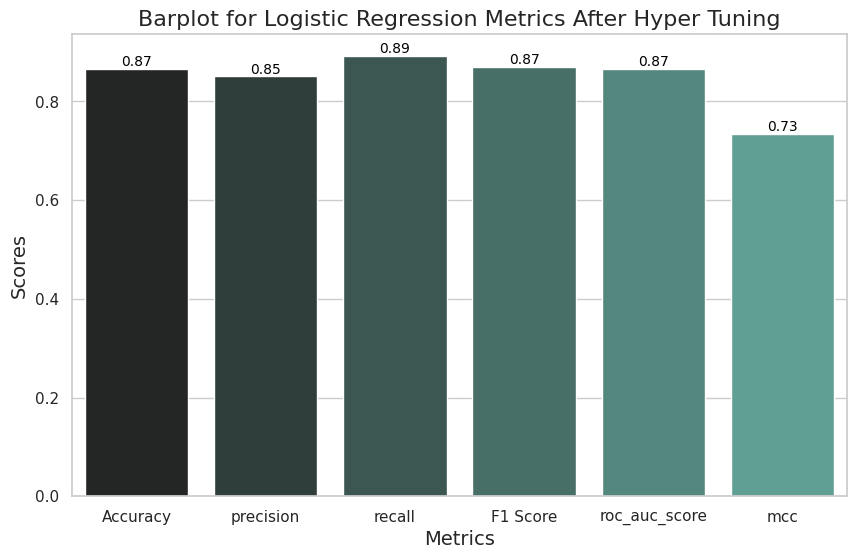

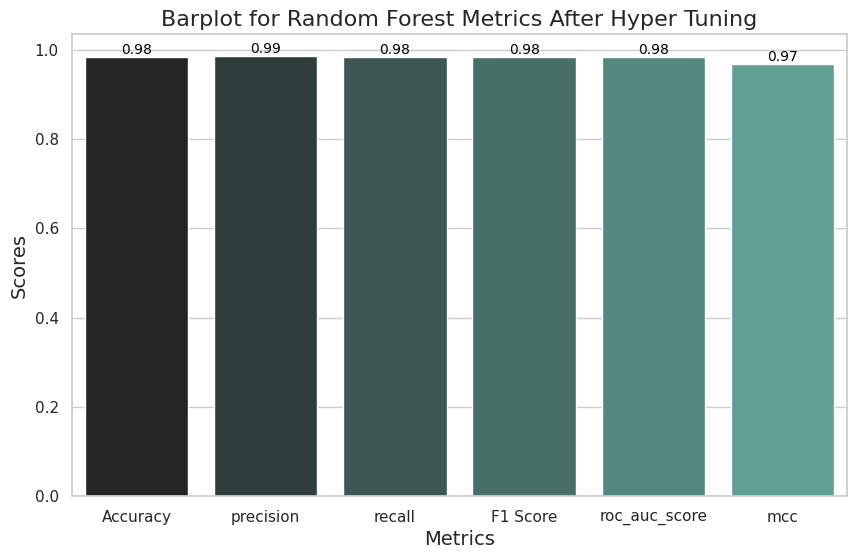

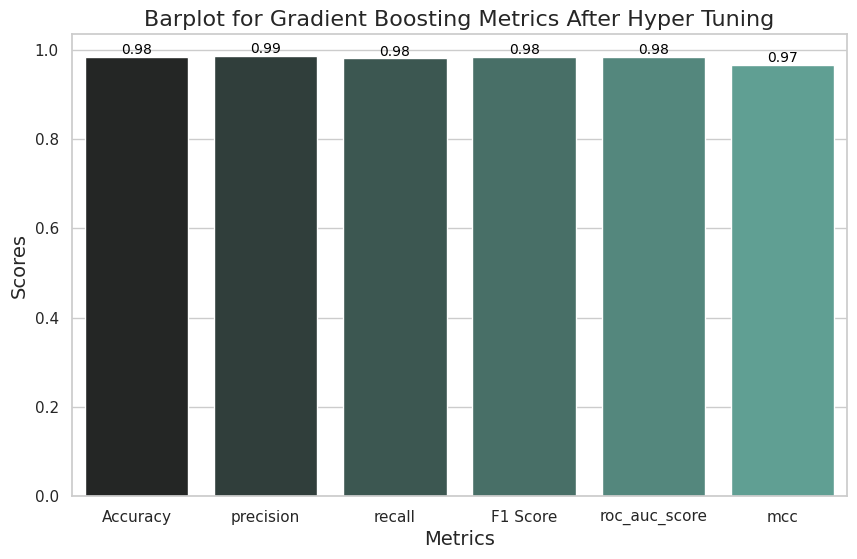

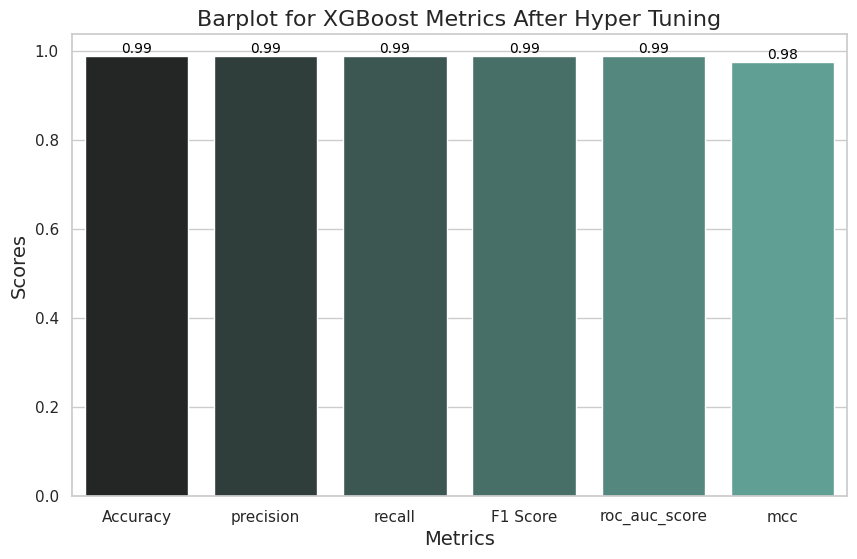

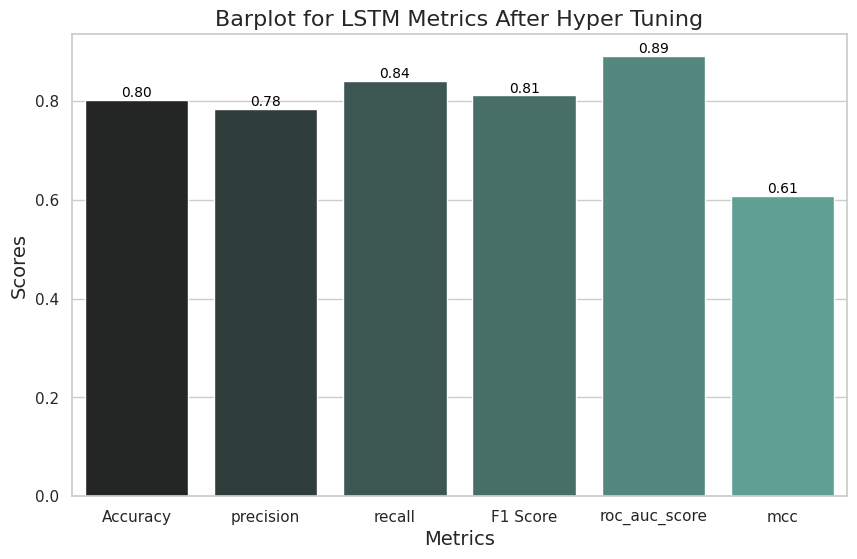

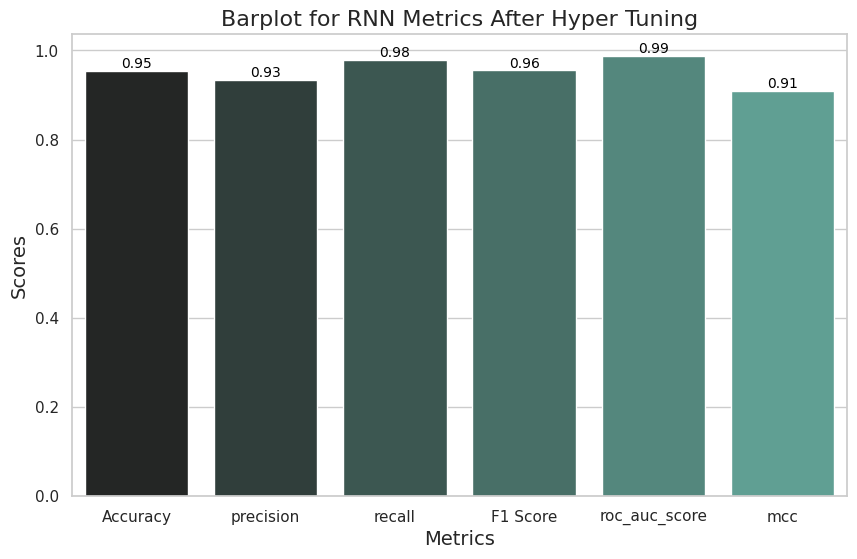

In [64]:
# Creating separate bar plots for each model with annotations and darker color palette
model_list = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'LSTM', 'RNN']
for model in model_list:
    plt.figure(figsize=(10, 6))
    model_data = evaluation_metrics_df_ht[evaluation_metrics_df_ht['Model'] == model]
    model_data_melted = model_data.melt(id_vars=['Model'], value_vars=['Accuracy', 'precision', 'recall', 'F1 Score', 'roc_auc_score', 'mcc'])
    
    # Create the barplot
    ax = sns.barplot(x='variable', y='value', data=model_data_melted, palette='dark:#5A9')
    
    # Adding annotations to bars
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.2f}", 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                    textcoords='offset points')
    
    # Adding titles and labels
    plt.title(f'Barplot for {model} Metrics After Hyper Tuning', fontsize=16)
    plt.xlabel('Metrics', fontsize=14)
    plt.ylabel('Scores', fontsize=14)
    
    # Show the plot
    plt.show()

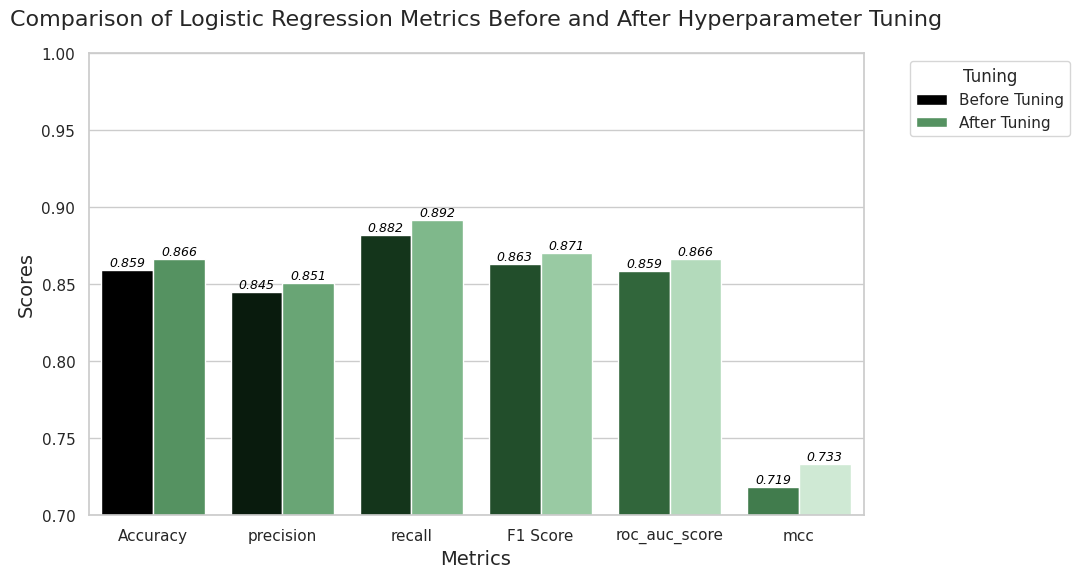

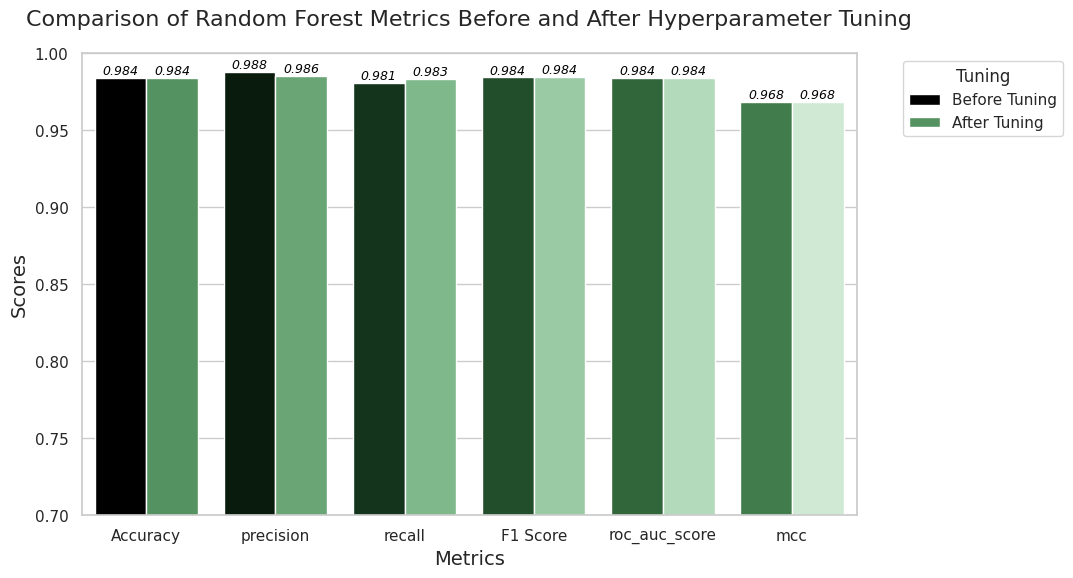

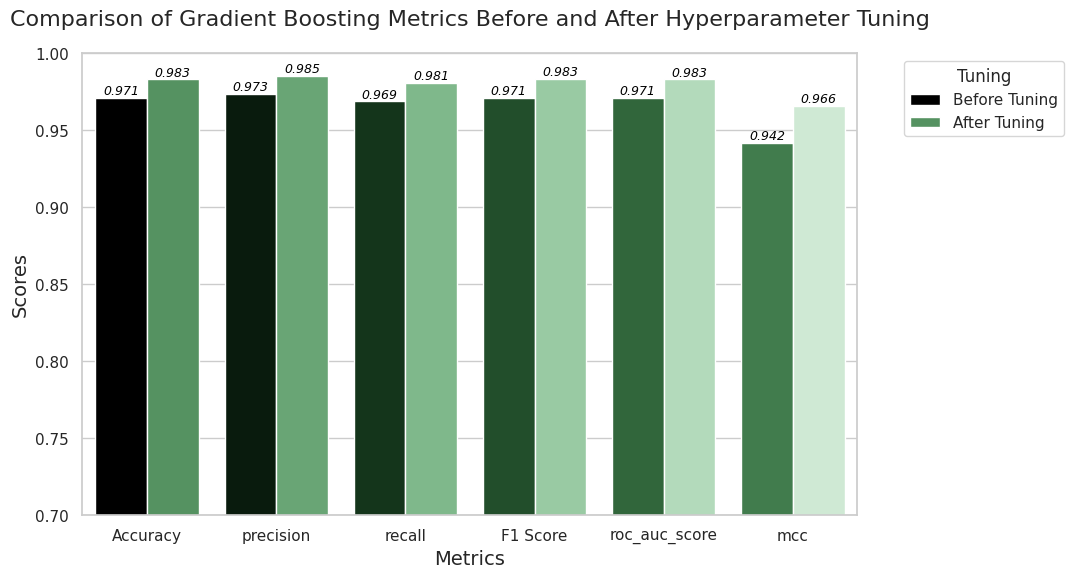

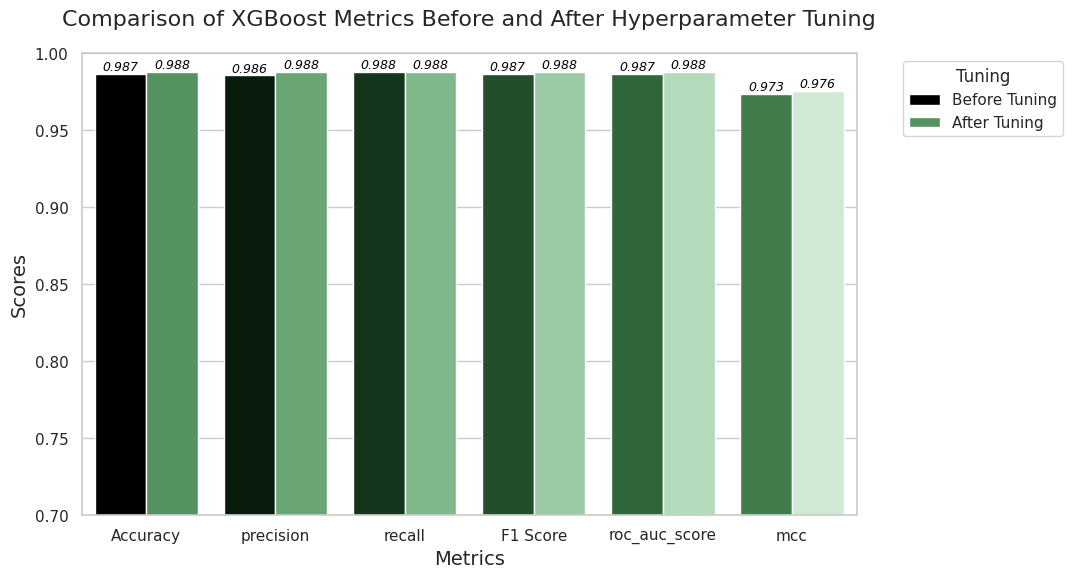

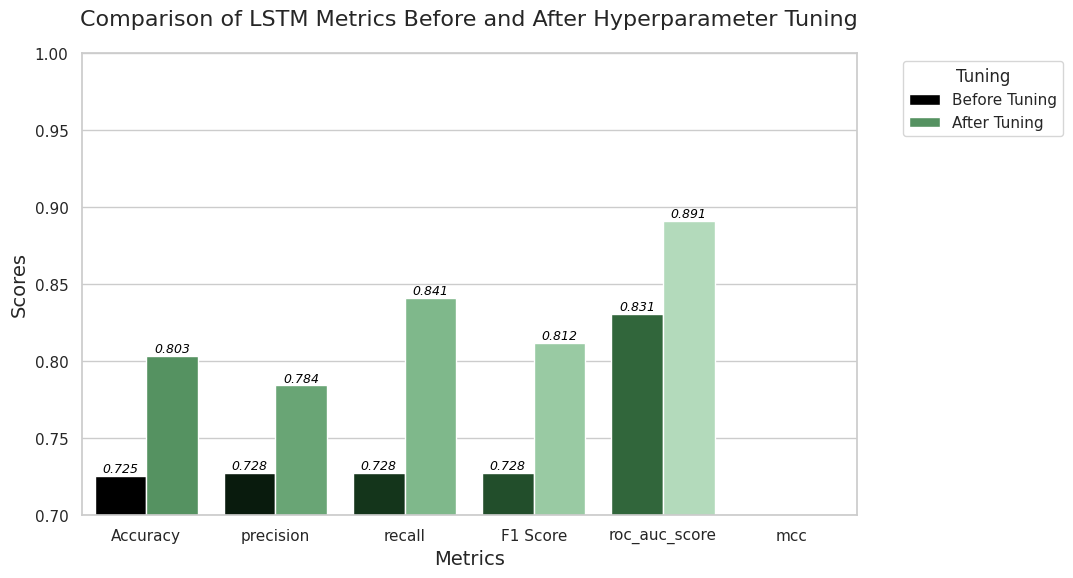

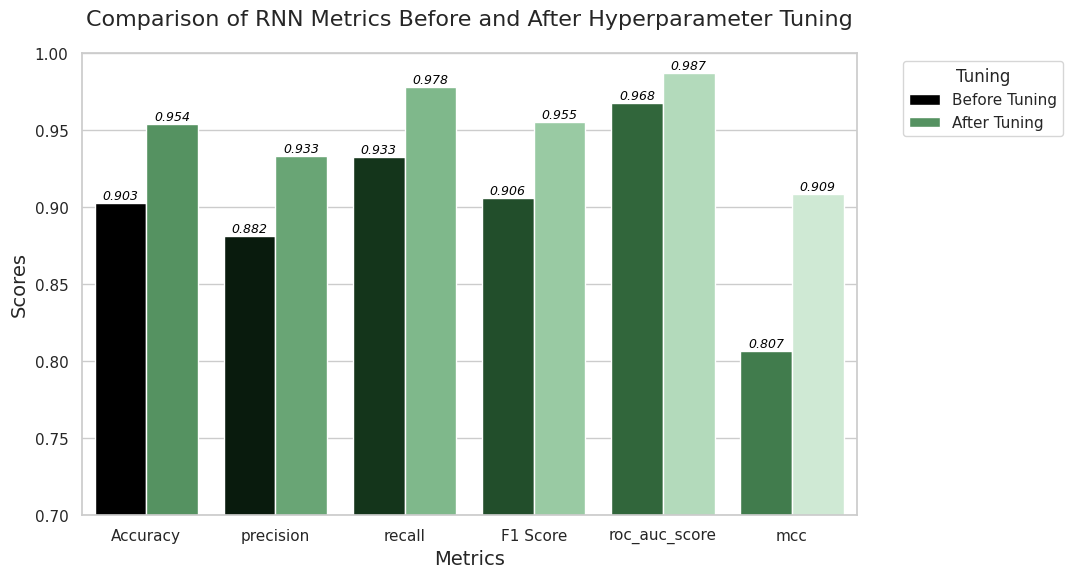

In [65]:
evaluation_metrics_df['Tuning'] = 'Before Tuning'
evaluation_metrics_df_ht['Tuning'] = 'After Tuning'
import matplotlib.cm as cm
evaluation_metrics_combined = pd.concat([evaluation_metrics_df, evaluation_metrics_df_ht])
cmap = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)

model_list = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'LSTM', 'RNN']

for model in model_list:
    plt.figure(figsize=(10, 6))
    plt.ylim(0.7, 1.0)
    
    model_data = evaluation_metrics_combined[evaluation_metrics_combined['Model'] == model]
    model_data_melted = model_data.melt(id_vars=['Model', 'Tuning'], value_vars=['Accuracy', 'precision', 'recall', 'F1 Score', 'roc_auc_score', 'mcc'])
    
    ax = sns.barplot(x='variable', y='value', hue='Tuning', data=model_data_melted, palette='mako')
    
    num_bars = len(ax.patches)
    for i, p in enumerate(ax.patches):
        gradient_ratio = i / num_bars
        gradient_color = cmap(gradient_ratio)
        p.set_facecolor(gradient_color)
        
    # Adding annotations to bars
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.3f}", 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=9, color='black', xytext=(0, 5), 
                    textcoords='offset points',fontstyle='italic')
    
    # Move legend outside of the plot
    plt.legend(title='Tuning', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Adding titles and labels
    plt.title(f'Comparison of {model} Metrics Before and After Hyperparameter Tuning', fontsize=16, pad=20)
    plt.xlabel('Metrics', fontsize=14)
    plt.ylabel('Scores', fontsize=14)
    

    plt.show()


In [94]:
evaluation_metrics_df_ht

Model  Accuracy  precision    recall  F1 Score  \
0  Logistic Regression  0.866343   0.850575  0.891566  0.870588   
1        Random Forest  0.984204   0.985507  0.983133  0.984318   
2    Gradient Boosting  0.982989   0.985472  0.980723  0.983092   
3              XGBoost  0.987849   0.987952  0.987952  0.987952   
4                 LSTM  0.803159   0.784270  0.840964  0.811628   
5                  RNN  0.953827   0.933333  0.978313  0.955294   

   roc_auc_score       mcc        Tuning  
0       0.866126  0.733423  After Tuning  
1       0.984213  0.968409  After Tuning  
2       0.983009  0.965988  After Tuning  
3       0.987848  0.975697  After Tuning  
4       0.891029  0.607665  After Tuning  
5       0.987007  0.908685  After Tuning

In [67]:
# best_rnn_model.save('rnn_model_final.h5')
# best_lstm_model.save('lst_model_final.h5')

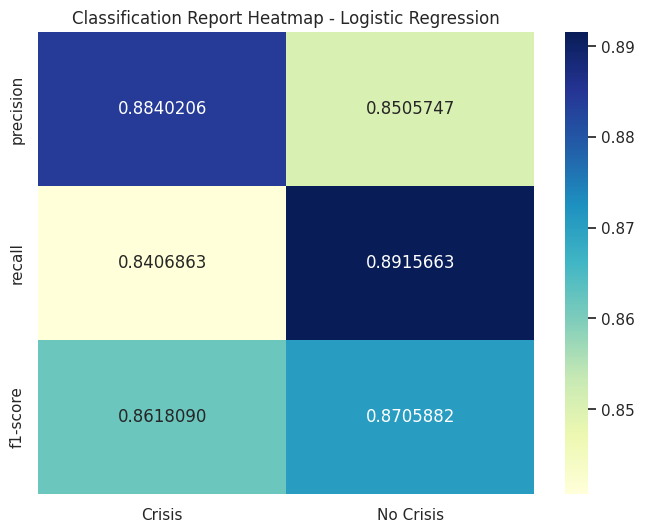

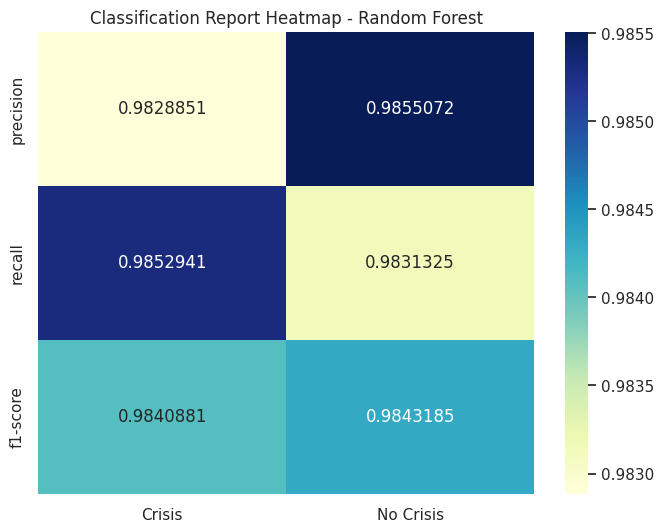

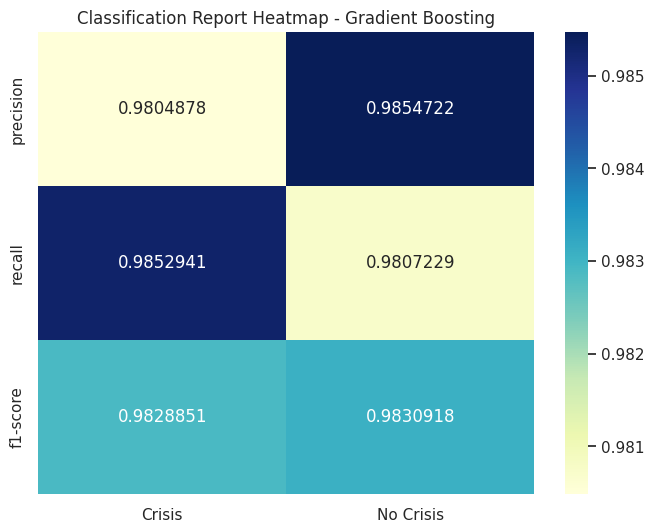

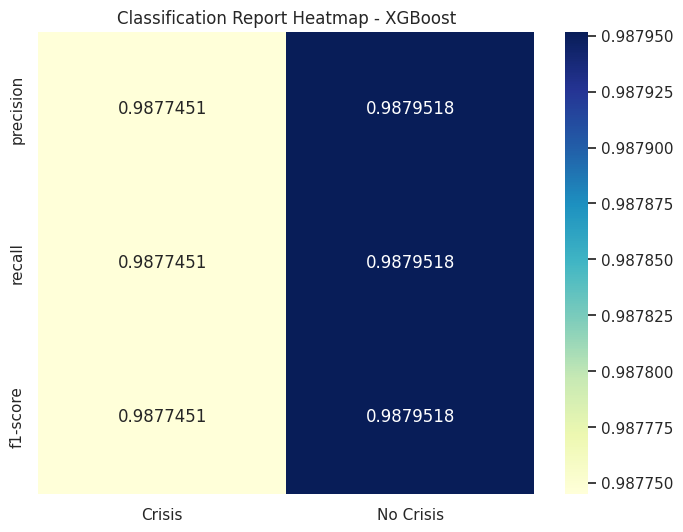

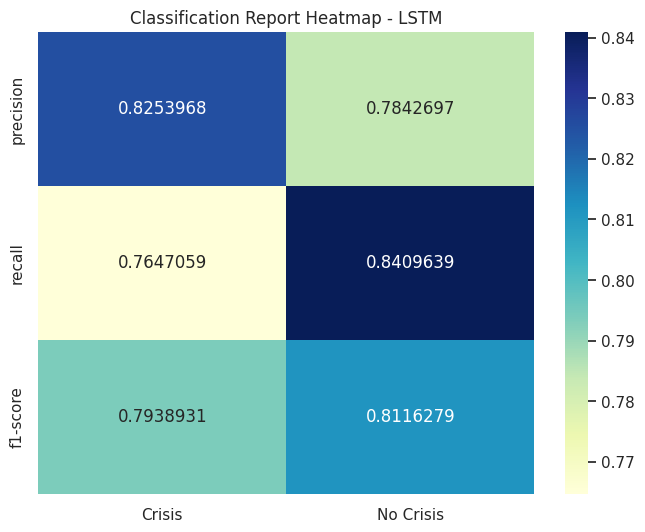

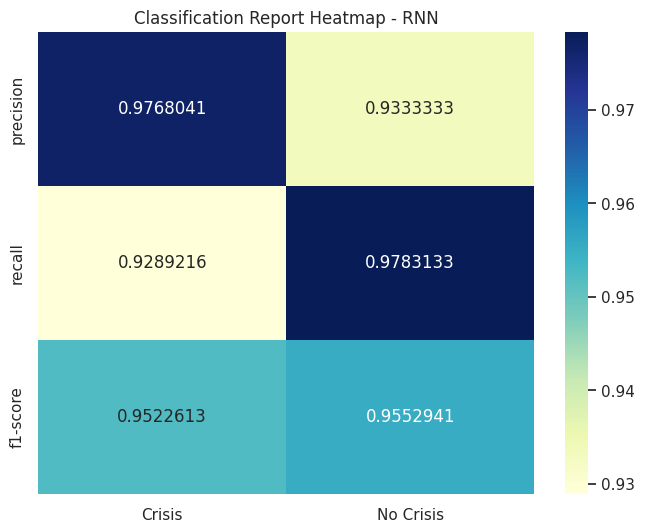

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Iterate through the classification reports and plot each one
for index, row in classification_reports_df.iterrows():
    model_name = row['Model']
    class_report = row['Classification Report']
    
    # Extract precision, recall, and F1-score for 'Crisis' and 'No Crisis' classes
    crisis_metrics = class_report['Crisis']
    no_crisis_metrics = class_report['No Crisis']
    
    # Create a DataFrame for the metrics
    metrics_df = pd.DataFrame({'Crisis': crisis_metrics, 'No Crisis': no_crisis_metrics}).iloc[:-1, :]
    
    
    # Create a heatmap
    plt.figure(figsize=(8, 6))
    
    sns.heatmap(metrics_df, annot=True, cmap='YlGnBu', fmt=".7f")
    plt.title(f'Classification Report Heatmap - {model_name}')
    plt.show()


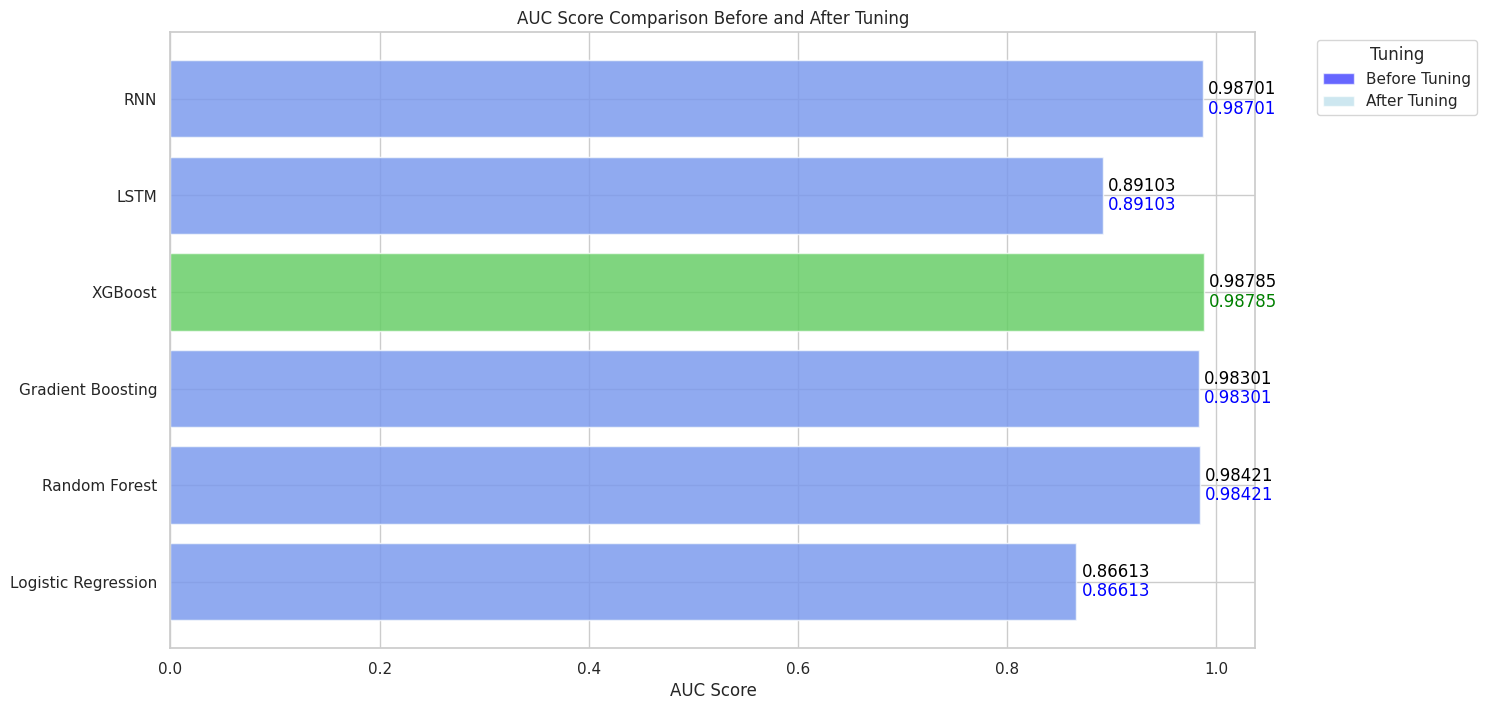

In [110]:
# Highlighting the best model in a different color
plt.figure(figsize=(14, 8))
df_after_tuning = evaluation_metrics_df_ht
df_before_tuning  = evaluation_metrics_df_ht
# Determine the best model based on highest AUC score after tuning
best_model = df_after_tuning.loc[df_after_tuning['roc_auc_score'].idxmax(), 'Model']

# Plotting the bars with conditional coloring
plt.barh(df_before_tuning['Model'], df_before_tuning['roc_auc_score'], 
         color=['blue' if model != best_model else 'green' for model in df_before_tuning['Model']], 
         alpha=0.6, 
         label='Before Tuning')

plt.barh(df_after_tuning['Model'], df_after_tuning['roc_auc_score'], 
         color=['lightblue' if model != best_model else 'lightgreen' for model in df_after_tuning['Model']], 
         alpha=0.6, 
         label='After Tuning')


# Adding text annotations with matching color
for i, v in enumerate(df_before_tuning['roc_auc_score']):
    text_color = 'blue' if df_before_tuning['Model'][i] != best_model else 'green'
    plt.text(v + 0.005, i - 0.1, str(round(v, 5)), color=text_color, va='center')

for i, v in enumerate(df_after_tuning['roc_auc_score']):
    text_color = 'black' if df_after_tuning['Model'][i] != best_model else 'black'
    plt.text(v + 0.005, i + 0.1, str(round(v, 5)), color=text_color, va='center')
    
# Move legend outside of the plot

plt.legend(title='Tuning', bbox_to_anchor=(1.05, 1), loc='upper left',labels=['Before Tuning', 'After Tuning', 'Best Model (Highlighted in Green)'])
plt.xlabel('AUC Score')
plt.title('AUC Score Comparison Before and After Tuning')

plt.show()


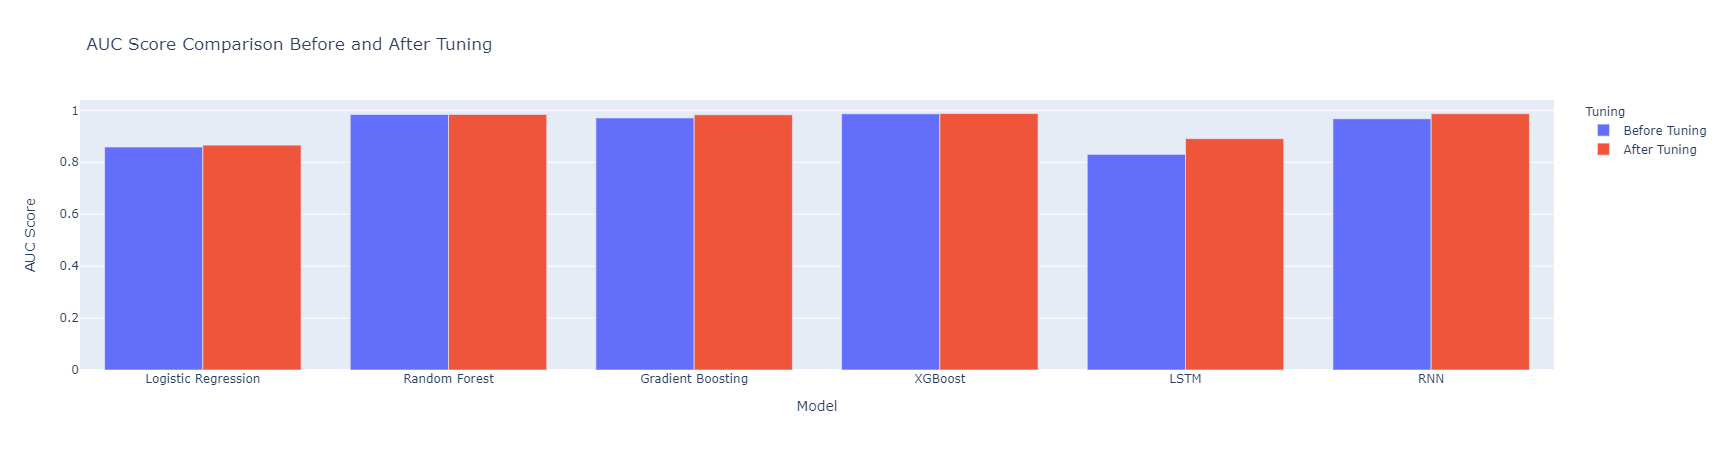

In [95]:
import plotly.express as px

fig = px.choropleth(
    df_jst.sort_values(by='year'),
    locations='country',
    animation_frame='year',
    labels={'cpi': 'cpi inflation rate', 'country': 'country'},
    color='cpi',
    animation_group='country'
    color_continuous_scale=px.colors.sequential.thermal,
    title='<b>Annual inflation rate of countries',
    template='plotly_dark',
    width=1500,  # Set the width
    height=800  # Set the height (same as width for a square figure)
)

fig.show()
